In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import collections, functools, operator 

# import script extract_rs_citations.py
from scripts import extract_rs_citations

In [2]:
data = pd.read_json('data/dataframes/df.json', orient='columns', encoding='utf-8')

In [3]:
data.tail()

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende
5821,4 StR 282/17,1506556800000,KORE634632017,BGH,4. Strafsenat,Urteil,Rücktritt vom Versuch eines Tötungsdelikts: Fr...,1. Auf die Revisionen der Staatsanwaltschaft u...,Das Landgericht hat den Angeklagten wegen gefä...
5822,2 StR 217/19,1573603200000,KORE634712019,BGH,2. Strafsenat,Urteil,Jugendstrafverfahren: jugendspezifische Bestim...,Die Revision des Angeklagten gegen das Urteil ...,Das Landgericht hat den Angeklagten wegen Tots...
5823,2 StR 447/19,1572912000000,KORE634732019,BGH,2. Strafsenat,Beschluss,Berücksichtigung von Einziehung bei Strafzumes...,1. Auf die Revision des Angeklagten wird das U...,Das Landgericht hat den Angeklagten wegen uner...
5824,3 StR 249/19,1573603200000,KORE634742019,BGH,3. Strafsenat,Beschluss,Formulierung des Antrags auf Einziehung im obj...,1. Auf die Revision des Angeklagten wird das U...,Das Landgericht hat den Angeklagten der Gründu...
5825,4 StR 289/19,1565827200000,KORE634782019,BGH,4. Strafsenat,Beschluss,Schwerer sexueller Kindesmissbrauch: Erfordern...,Auf die Revision des Angeklagten wird das Urte...,Das Landgericht hat den Angeklagten wegen schw...


# Extrahieren

In [4]:
# use script extract_rs_citations.py

def extract_citations(text):
    return extract_rs_citations.extract_annotations_from_text(text)    

### Zitate in Gruende suchen

In [7]:
data["citations_gruende"] = data["gruende"].apply(extract_citations)

In [ ]:
# save dataframe with citations_gruende
data.to_json("data/dataframes/df_citations_gruende.json")

In [9]:
# read df from json
data_citations_gruende = pd.read_json('data/dataframes/df_citations_gruende.json', orient='columns', encoding='utf-8')

In [11]:
# example 7
data_citations_gruende.iloc[7].citations_gruende

[['BGH, Beschluss vom 9. Oktober 2007 - 5 StR 374/07', 1749, 1798],
 ['BGH, Beschluss vom 26. August 2009 - 2 StR 302/09', 2232, 2281],
 ['BGH, Beschluss vom 25. Februar 2009 - 5 StR 22/09', 3122, 3171],
 ['Senatsbeschluss vom 8. April 2008 - 4 StR 21/08', 3580, 3627],
 ['Senatsbeschluss vom 16. Dezember 2008 - 4 StR 552/08, NStZ-RR 2009, 105',
  3734,
  3805]]

In [12]:
# example 783
data_citations_gruende.iloc[783].citations_gruende

[['BGH, Beschluss vom 22. November 2011 - 4 StR 522/11, NZV 2012, 249',
  3721,
  3787],
 ['Urteil vom 30. März 1995 - 4 StR 725/94, NJW 1995, 3131, 3132', 3789, 3850],
 ['BGH, Beschluss vom 2. Juli 2013 - 4 StR 187/13, NStZ-RR 2013, 320, 321',
  4355,
  4425],
 ['Beschluss vom 29. April 2008 - 4 StR 617/07, NStZ-RR 2008, 289',
  4427,
  4489],
 ['BGH, Beschluss vom 28. September 2010 - 4 StR 245/10, NStZ 2011, 215, 216',
  4973,
  5046],
 ['Beschluss vom 29. April 2008 - 4 StR 617/07, NStZ-RR 2008, 289',
  5048,
  5110]]

In [14]:
# Ausprobieren, ob beispielhaftes Aktenzeichen aus Zitat in Aktenzeichenmenge vorhanden
np.where(data_citations_gruende["az"] == "2 ARs 46/15")

(array([2787]),)

In [15]:
data_citations_gruende.iloc[2787]

az                                                         2 ARs 46/15
datum                                                    1496793600000
doknr                                                    KORE617612017
gertyp                                                             BGH
spruchkoerper                                            2. Strafsenat
doktyp                                                       Beschluss
titel                Bußgeldverfahren: Örtlich zuständiges Gericht ...
tenor                Die Untersuchung und Entscheidung der Sache wi...
gruende              I. Die „Generaldirektion Wasserstraßen und Sch...
citations_gruende    [[VG Schleswig, Urteil vom 16. September 2014 ...
Name: 2787, dtype: object

In [16]:
data_citations_gruende.iloc[4921]

az                                                        2 ARs 282/18
datum                                                    1558396800000
doknr                                                    KORE625672019
gertyp                                                             BGH
spruchkoerper                                            2. Strafsenat
doktyp                                                       Beschluss
titel                Zuständiges Amtsgericht bei Einspruch gegen Bu...
tenor                Der Verweisungsbeschluss des Amtsgerichts Kiel...
gruende              Die „Bundesagentur für Arbeit - Agentur für Ar...
citations_gruende    [[Nürnberg (Oberlandesgerichtsbezirk Nürnberg,...
Name: 4921, dtype: object

### --> Evaluation der Zitatextraktion s. Notebook EvaluationCitationExtraction

### Wie viele Zitate gibt es pro (Gruende-)Text?

In [202]:
def getAmountCitations(cit_list: list):
    if cit_list:
        return len(cit_list)
    else:
        return 0

In [18]:
amount_citations_in_gruende = data_citations_gruende["citations_gruende"].apply(getAmountCitations)

In [19]:
amount_citations_in_gruende.head(10)

0     3
1     1
2     0
3     3
4    11
5     0
6     5
7     5
8    14
9     3
Name: citations_gruende, dtype: int64

Gesamtmenge von identifizierten Zitaten in allen Gruende-Texten

In [20]:
sum(amount_citations_in_gruende)

52699

maximale Menge an Zitationen in einem Gruende-Text:

In [21]:
amount_citations_in_gruende.max()

165

durchschnittliche Anzahl von Rechtsprechungszitaten in Gruende:

In [22]:
amount_citations_in_gruende.mean()

9.04548575351871

in 661 Fällen gibt es kein Rechtsprechungszitat (jedenfalls wurde keines gefunden) in Gruende

In [23]:
np.where(amount_citations_in_gruende == 0)

(array([   2,    5,   11,   12,   16,   17,   23,   25,   28,   36,   39,
          44,   53,   63,   64,   66,   71,   79,   83,   91,   98,  102,
         105,  108,  117,  128,  132,  144,  149,  154,  160,  164,  191,
         192,  193,  201,  226,  233,  238,  241,  250,  261,  264,  276,
         287,  305,  333,  350,  351,  353,  357,  374,  396,  403,  406,
         417,  419,  433,  452,  456,  473,  495,  497,  498,  500,  511,
         512,  523,  543,  559,  625,  648,  663,  697,  698,  709,  710,
         712,  715,  722,  731,  732,  742,  746,  760,  764,  765,  803,
         808,  811,  821,  827,  830,  838,  851,  856,  872,  882,  883,
         891,  900,  906,  933,  939,  948,  976,  979,  980,  993,  997,
        1000, 1002, 1005, 1012, 1015, 1021, 1022, 1023, 1031, 1037, 1041,
        1044, 1048, 1050, 1054, 1061, 1062, 1065, 1068, 1085, 1097, 1099,
        1103, 1104, 1105, 1108, 1111, 1125, 1135, 1137, 1165, 1181, 1198,
        1208, 1215, 1218, 1221, 1231, 

In [24]:
np.where(amount_citations_in_gruende == 0)[0].size

661

in 11% aller Dokumente werden keine Zitate in Gruende gefunden:

In [25]:
np.where(amount_citations_in_gruende == 0)[0].size/len(amount_citations_in_gruende)

0.11345691726742191

### Zitate in Tenor suchen und Tabelle ergänzen

In [27]:
# takes a while; better directly load from df_all_citations.json 2 cells further down
data_citations_gruende["citations_tenor"] = data_citations_gruende["tenor"].apply(extract_citations)

In [160]:
# save dataframe with citations_gruende and citations_tenor
data_citations_gruende.to_json("data/dataframes/df_all_citations.json")

In [199]:
# read df from json
data_all_citations = pd.read_json('data/dataframes/df_all_citations.json', orient='columns', encoding='utf-8')

In [200]:
data_all_citations.tail()

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende,citations_gruende,citations_tenor
5821,4 StR 282/17,1506556800000,KORE634632017,BGH,4. Strafsenat,Urteil,Rücktritt vom Versuch eines Tötungsdelikts: Fr...,1. Auf die Revisionen der Staatsanwaltschaft u...,Das Landgericht hat den Angeklagten wegen gefä...,"[[BGH, Urteil vom 17. Dezember 1992 – 4 StR 53...",None
5822,2 StR 217/19,1573603200000,KORE634712019,BGH,2. Strafsenat,Urteil,Jugendstrafverfahren: jugendspezifische Bestim...,Die Revision des Angeklagten gegen das Urteil ...,Das Landgericht hat den Angeklagten wegen Tots...,"[[BGH, Beschluss vom 6. Mai 2013 ‒ 1 StR 178/1...",None
5823,2 StR 447/19,1572912000000,KORE634732019,BGH,2. Strafsenat,Beschluss,Berücksichtigung von Einziehung bei Strafzumes...,1. Auf die Revision des Angeklagten wird das U...,Das Landgericht hat den Angeklagten wegen uner...,"[[Senat, Beschluss vom 12. März 2013 - 2 StR 4...",None
5824,3 StR 249/19,1573603200000,KORE634742019,BGH,3. Strafsenat,Beschluss,Formulierung des Antrags auf Einziehung im obj...,1. Auf die Revision des Angeklagten wird das U...,Das Landgericht hat den Angeklagten der Gründu...,"[[Senat, Beschluss vom 7. Januar 2003 - 3 StR ...",None
5825,4 StR 289/19,1565827200000,KORE634782019,BGH,4. Strafsenat,Beschluss,Schwerer sexueller Kindesmissbrauch: Erfordern...,Auf die Revision des Angeklagten wird das Urte...,Das Landgericht hat den Angeklagten wegen schw...,"[[BGH, Beschluss vom 14. November 2018 - 2 StR...","[[Urteil des Landgerichts Frankenthal (Pfalz, ..."


### Wie viele Zitate gibt es pro (Tenor-)Text?

In [203]:
amount_citations_in_tenor = data_all_citations["citations_tenor"].apply(getAmountCitations)

Gesamtmenge von identifizierten Zitaten in allen Gruende-Texten

In [35]:
sum(amount_citations_in_tenor)

1701

in 570 (ca. 10%) der Tenortexte werden Zitate (min. 1 Zitat) gefunden

In [36]:
np.where(amount_citations_in_tenor != 0)[0].size

570

In [37]:
amount_citations_in_tenor.max()

23

In [38]:
amount_citations_in_tenor.mean()

0.291967044284243

## Aktenzeichen aus Zitaten extrahieren

In [39]:
# 'Senat, Beschlüsse vom 7. Juni 2017 - 2 ARs 46/15, NStZ-RR 2017, 256 f.',
# 'vom 2. Januar 1990 - 2 ARs 588/89, BGHR OWiG § 68 Abs. 1 Satz 1'
# 'Senatsbeschluss vom 8. April 2008 - 4 StR 21/08'
# 'Senatsbeschluss vom 16. Dezember 2008 - 4 StR 552/08, NStZ-RR 2009, 105'

In [40]:
# unmöglich ohne Wissensbasis!?
data_citations_gruende.iloc[2039].citations_gruende

[['BGHSt 42, 368', 1333, 1346],
 ['BGH NJW 1999, 3206, 3207', 1359, 1383],
 ['BGH NStZ 2000, 433', 2040, 2058]]

In [1065]:
# einzelne Ziffer, (es gibt Ausnahmen, wo diese Ziffer fehlt: "StB 24/19", "AK 78/17")
# Leerzeichen,
# Abkürzung (bestehend aus 2-3 Buchstaben (?), erster davon großgeschrieben),
#     --> hier meist: StR, ARs. Sonderfälle hier: AK, StB, 5 AR (VS) 23/10
# Leerzeichen,
# Zahl (1 bis 3stellig)
# /
# Zahl (2-ziffrig)

# Besonderheiten historischer Aktenzeichen:
# Rep. 1763/84 --> von 1884, d.h. 19. Jh.
# II 476/20 --> von 1920
# 1 D 1096/33 --> von 1933

In [188]:
# Regex patterns

# Standardfall:
rs_citation_standard = re.compile("\d{1}\s+[A-Z][a-z]?[A-Z]?[a-z]?\s+\d+\/\d{2}")  

# 5 AR (VS) 23/10
rs_citation_standard_extra = re.compile("\d+\s+[A-Z][a-z]?[A-Z]?[a-z]?\s?(\([A-Za-z]+\)\s)\d+\/\d{2}")

# römisch
# VI ZR 13/18
rs_citation_roman = re.compile("[MDCLXVI]+\s+[A-Z][a-z]?[A-Z]?[a-z]?\s+\d+\/\d{2}")

# Sonderfälle:
# StB 21/10
# AK 78/17
# GSSt 3/57
rs_citation_special = re.compile("\s+[A-Z]+[a-z]?[A-Z]?[a-z]?\.?\s+\d+\/\d{2}")

# evtl. hilfreich: https://www.gerichtsaktenzeichen.de/aufbau-der-gerichtsaktenzeichen/

### Registerzeichen
- GSSt: beim Bundesgerichtshof für Verfahren vor dem Großen Senat in Strafsachen verwendet
- StB: beim Bundesgerichtshof für Verfahren über Beschwerden in Strafsachen - in Ermittlungsverfahren des Generalbundesanwalts - verwendet.
- StR: beim (ehem.) Bayerisches Oberstes Landesgericht und beim Bundesgerichtshof für Revisionsverfahren in Strafsachen verwendet.
....

In [42]:
# NEU
def extractAktenzeichen(citation_list: list):
    if citation_list:
        azs = []
        for item in citation_list:
            # long with parantheses
            al = rs_citation_standard_extra.findall(item[0])
            if al:
                azs.append(al)
            # standard
            az = rs_citation_standard.findall(item[0])
            if az:
                azs.append(az)
            # roman
            azr = rs_citation_roman.findall(item[0])
            if azr:
                azs.append(azr)
            # ohne vorangehende Ziffer
            if not az and not azr:
                azsp = rs_citation_special.findall(item[0])
                if azsp:
                    azs.append(azsp)
        return azs
    else:
        return None

In [43]:
data_all_citations["cited_az_gruende"] = data_all_citations["citations_gruende"].apply(extractAktenzeichen)

In [44]:
data_all_citations["cited_az_tenor"] = data_all_citations["citations_tenor"].apply(extractAktenzeichen)

In [1232]:
# save df
data_all_citations.to_json("data/dataframes/df_all_az.json")

In [143]:
# load df
data_all_az = pd.read_json('data/dataframes/df_all_az.json', orient='columns', encoding='utf-8')

Aktenzeichen sind fast nie mit römischer Ziffer in Datensatz vermerkt
 --> vermutlich Übersetzung von römisch zu arabisch notwendig für Abbildung

In [47]:
# 848 hat 2 Aktenzeichen! s. unten für weitere Ausnahmen / Besonderheiten
data_all_az.iloc[848]
# --> in az später immer nach substring suchen

az                                                  AK 4/18, StB 29/17
datum                                                    1519257600000
doknr                                                    KORE620912018
gertyp                                                             BGH
spruchkoerper                                            3. Strafsenat
doktyp                                                       Beschluss
titel                Untersuchungshaft wegen des Verdachts von Krie...
tenor                1. Auf die Beschwerde des Beschuldigten wird d...
gruende              I. Der Beschuldigte befindet sich in dieser Sa...
citations_gruende    [[BGH, Beschluss vom 14. Juni 2012 - AK 18/12,...
citations_tenor                                                   None
cited_az_gruende     [[ AK 18/12], [3 StR 230/16], [3 StR 57/17], [...
cited_az_tenor                                                    None
Name: 848, dtype: object

In [48]:
data_all_az.cited_az_gruende

0                                        [[2 ARs 547/06]]
1                                                      []
2                                                    None
3                        [[2 StR 375/08], [3 StR 171/09]]
4                                         [[3 StR 71/05]]
                              ...                        
5821    [[4 StR 532/92], [2 StR 289/13], [4 StR 16/55]...
5822    [[1 StR 178/13], [5 StR 214/18], [2 StR 150/18...
5823    [[2 StR 43/13], [3 StR 470/11], [3 StR 137/14]...
5824                     [[3 StR 421/02], [2 StR 231/18]]
5825    [[2 StR 419/18], [2 StR 13/14], [2 StR 286/15]...
Name: cited_az_gruende, Length: 5826, dtype: object

## Analyse der Zitate und Aktenzeichen 

### nach Jahr

1. aus Zitaten extrahierte

aus vollem Zitat, jeweils, wenn vorhanden, die erste (vierstellige) Jahreszahl extrahieren

In [50]:
rs_full_year = re.compile("\s(18|19|20)\d{2}\s")

In [51]:
def getYearsFromFullCitation(az: list):
    years = []
    if az:
        for item in az:
            year = rs_full_year.search(item[0])
            if year and int(year.group()) < 2021:
                years.append(int(year.group()))
        return years 

In [52]:
years_gruende = data_all_az.citations_gruende.apply(getYearsFromFullCitation)

In [53]:
years_tenor = data_all_az.citations_tenor.apply(getYearsFromFullCitation)

In [56]:
years_gruende.tail()

5821    [1992, 2013, 1955, 2014, 1955, 2013, 2006, 199...
5822    [2013, 2018, 2018, 2018, 2004, 2017, 2016, 201...
5823                 [2013, 2012, 2014, 2018, 1993, 2013]
5824                                         [2003, 2018]
5825                 [2018, 2014, 2016, 2014, 2008, 2014]
Name: citations_gruende, dtype: object

In [57]:
# collect all years from gruende in one list
all_years_gruende = []
for item in years_gruende:
    if item:
        all_years_gruende += item

In [58]:
# collect all years from tenor in one list
all_years_tenor = []
for item in years_tenor:
    if item:
        all_years_tenor += item

In [59]:
len(all_years_gruende)

46629

In [60]:
len(all_years_tenor)

1422

In [61]:
max(all_years_gruende)

2020

In [62]:
max(all_years_tenor)

2020

In [63]:
min(all_years_gruende) 

1812

In [64]:
min(all_years_tenor)

1917

In [65]:
sum(all_years_gruende)/len(all_years_gruende)

2003.6671170301743

In [66]:
sum(all_years_tenor)/len(all_years_tenor)

2003.4697609001407

In [67]:
all_years = all_years_tenor + all_years_gruende

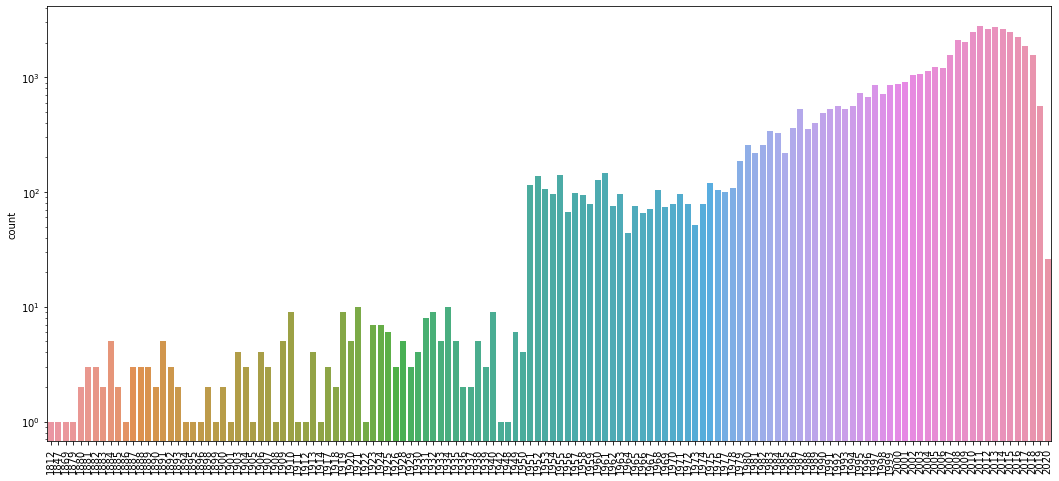

In [68]:
f1 = plt.figure(figsize=(18,8))
plt.xticks(rotation=90, fontsize=10)
# log scale!
plt.yscale('log')
sns.countplot(all_years)
f1.savefig("images/plots/jahre_aller_Zitate.png", bbox_inches="tight", dpi=600)

2. Aktenzeichen der Dokumente des gegebenen Datensatzes

In [69]:
def getYearFromAzString(az: str):
    year = "20" + az[len(az)-2:]
    return int(year)  

In [70]:
data_all_az.iloc[5685]

az                                                      4 StR 96/19, 7
datum                                                    1570665600000
doknr                                                    KORE620012020
gertyp                                                             BGH
spruchkoerper                                            4. Strafsenat
doktyp                                                       Beschluss
titel                Straßenverkehrsdelikte: Anforderungen an die B...
tenor                Auf die Revision des Angeklagten wird das Urte...
gruende              Das Landgericht hat den Angeklagten wegen vors...
citations_gruende    [[BGH, Urteile vom 1. März 2018 ‒ 4 StR 399/17...
citations_tenor                                                   None
cited_az_gruende     [[4 StR 399/17], [1 StR 416/17], [3 StR 172/17...
cited_az_tenor                                                    None
Name: 5685, dtype: object

In [72]:
# correct "4 StR 96/19, 7" --> "4 StR 96/19"
data_all_az["az"][5685] = "4 StR 96/19"

In [73]:
doc_az_years = data_all_az['az'].apply(getYearFromAzString)

In [74]:
doc_az_years

0       2009
1       2009
2       2009
3       2009
4       2009
        ... 
5821    2017
5822    2019
5823    2019
5824    2019
5825    2019
Name: az, Length: 5826, dtype: int64

In [75]:
doc_az_years.max()

2020

In [76]:
doc_az_years.min()

2007

In [77]:
sum(doc_az_years) / len(doc_az_years)

2014.4713353930656

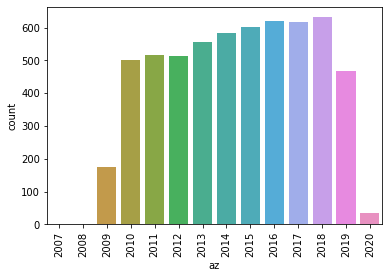

In [78]:
f2 = plt.figure()
plt.xticks(rotation=90)
sns.countplot(doc_az_years)

f2.savefig("images/plots/jahre_aller_az.png", bbox_inches="tight", dpi=600)

## nach Registerzeichen -- welche kommen vor und wie sind sie verteilt?

### 1. Aktenzeichen der Dokumente des gegebenen Datensatzes: Welche Registerzeichen kommen vor?

In [79]:
# Durchschauen großer Menge von az ergibt folgende Besonderheiten:

# data_all_az.az.iloc[650:700]

# Besonderheiten:
# 514    StB 9 und 10/16, StB 9/16, StB 10/16
# 306       StB 16/13
# 339        StB 4/14
# 125        AK 17/11
# 630    AK 15/19, StB 9/19
# 733    5 AR (Vs) 5/17
# 848    AK 4/18, StB 29/17
# 1110    StB 8/11, StB 9/11
# 1318    5 AR (VS) 29/13
# 1532      2 StR 137/14, 2 StR 337/14
# 1537    StB 14 - 16/16, StB 14/16, StB 15/16, StB 16/16
# 4046    5 AR (VS) 23/10
# 378    4 ARs 20-1/14, 2 StR 104/14
# 389     2 StR 137/14, 2 StR 337/14
# 392    4 ARs 20-1/14, 2 StR 104/14
# 466    StB 10/15, StB 11/15
# 695    5 StR 623/17 und 5 StR 624/17

In [80]:
data_all_az.az

0       2 ARs 569/09
1       3 StR 500/09
2       5 StR 507/09
3       5 StR 509/09
4       3 StR 502/09
            ...     
5821    4 StR 282/17
5822    2 StR 217/19
5823    2 StR 447/19
5824    3 StR 249/19
5825    4 StR 289/19
Name: az, Length: 5826, dtype: object

In [81]:
# regex to find Registerzeichen
registerz = re.compile("[A-Z][a-zA-Z]*\s")

In [82]:
# regex to find Registerzeichen with different structure such as 5 AR (VS) 29/13
registerz2 = re.compile("[A-Z][a-zA-Z]+\s?\([a-zA-Z]{2}\)\s")

In [83]:
def checkRoman(regz: str):
    rom = ["I ", "II ", "III ", "IV ", "V ", "VI ", "VII ", "VIII ", "IX "]
    return regz in rom

In [84]:
def getRegisterzeichen(az: str):
    rz2 = registerz2.findall(az)
    if rz2:
        if len(rz2) > 1:
            if checkRoman(rz2[0]):
                return rz2[1]
        else:
            return rz2[0]
    else:
        rz1 = registerz.findall(az)
        if rz1:
            return rz1[0]   

In [85]:
doc_az_regz = data_all_az["az"].apply(getRegisterzeichen)
# hier wird immer nur das erste Registerzeichen geholt (auch falls im Original mehrere angegeben sind)

In [86]:
doc_az_regz.tolist().count(None)

0

In [87]:
len(doc_az_regz)

5826

In [89]:
set(doc_az_regz)

{'AK ', 'AR (VS) ', 'AR (Vs) ', 'ARs ', 'StB ', 'StR '}

In [90]:
# Das Registerzeichen ARs wird beim Bundesgerichtshof für Gerichtsstandbestimmungen in Strafsachen
# sowie für Auslieferungssachen verwendet.

# Das Registerzeichen AR wird bei jedem Gericht für Vorverfahren oder sonstige 
# Verfahren (als "Allgemeines Register") verwendet.

# Das Registerzeichen StB wird beim Bundesgerichtshof für Verfahren über
# Beschwerden in Strafsachen - in Ermittlungsverfahren des Generalbundesanwalts - verwendet.

# Das Registerzeichen StR wird beim (ehem.) Bayerisches Oberstes Landesgericht
# und beim Bundesgerichtshof für Revisionsverfahren in Strafsachen verwendet.

# Das Registerzeichen AK wird beim Bundesgerichtshof für Aktenkontrollen
# in Haftprüfungsverfahren verwendet.

# Das Registerzeichen AR(VS) wird beim Bundesgerichtshof für Entscheidungen über Justizverwaltungsakte
# im Bereich des Strafrechts verwendet.

<AxesSubplot:xlabel='az', ylabel='count'>

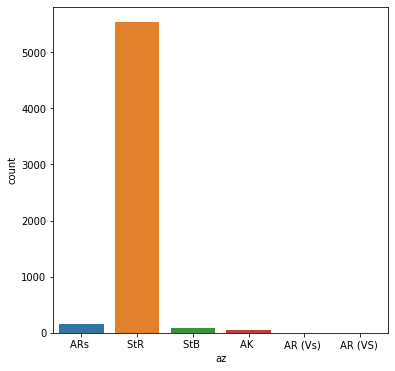

In [91]:
plt.figure(figsize=(6,6))
sns.countplot(doc_az_regz)

In [92]:
doc_az_regz_list = doc_az_regz.tolist()

In [93]:
reg_dict = {i: doc_az_regz_list.count(i) for i in doc_az_regz_list}

In [94]:
reg_dict

{'ARs ': 152,
 'StR ': 5535,
 'StB ': 84,
 'AK ': 47,
 'AR (Vs) ': 3,
 'AR (VS) ': 5}

In [96]:
reg_dict.get("StR ") / sum(reg_dict.values())
# --> 95% der Registerzeichen in allen Az sind StR

0.9500514933058702

### 2. aus Zitaten extrahierte

In [97]:
# NEU 
def getRegZFromAz(az: list):
    regzs = []  
    if az:
        # flatten to keep every az
        flat_az = [item for sublist in az for item in sublist]
        for item in flat_az:             
            rz2 = registerz2.findall(item)                
            if rz2:
                if len(rz2) > 1:
                    if checkRoman(rz2[0]):
                        regzs.append(rz2[1])                
                else:
                    regzs.append(rz2[0])
            else:
                rz1 = registerz.findall(item)
                if rz1:
                    regzs.append(rz1[0])
        return regzs                     

In [98]:
regz_gruende = data_all_az["cited_az_gruende"].apply(getRegZFromAz)

In [99]:
regz_tenor = data_all_az["cited_az_tenor"].apply(getRegZFromAz)

In [100]:
regz_gruende

0                                                  [ARs ]
1                                                    None
2                                                    None
3                                            [StR , StR ]
4                                                  [StR ]
                              ...                        
5821    [StR , StR , StR , StR , StR , StR , StR , StR...
5822    [StR , StR , StR , StR , BvR , StR , StR , StR...
5823                 [StR , StR , StR , StR , StR , StR ]
5824                                         [StR , StR ]
5825                 [StR , StR , StR , StR , StR , StR ]
Name: cited_az_gruende, Length: 5826, dtype: object

In [101]:
# collect all registerzeichen from gruende in one list
all_regz_gruende = []
for item in regz_gruende:
    if item:
        all_regz_gruende += item

In [103]:
len(all_regz_gruende)

46373

In [104]:
regz_gruende_set = set(all_regz_gruende)
# 'I', 'II', 'III', 'IV', 'IX', 'V', 'VI', 'VIII', 'X', 'XI', 'XII'
# können (Ersatz für) Registerzeichen (Anfang 20. Jahrhundert, z.B. .../21) sein oder
# Registerzeichen vorangestellt stehen -- hier ist diese Zählung etwas ungenau

alle vorkommenden (erfassten) Registerzeichen in GRUENDE:

In [105]:
regz_gruende_set

{'A ',
 'ABR ',
 'AGH ',
 'AK ',
 'AR ',
 'ARZ ',
 'ARs ',
 'AS ',
 'AV ',
 'AZN ',
 'AZR ',
 'Ars ',
 'B ',
 'BGs ',
 'BJs ',
 'BR ',
 'Bs ',
 'BvA ',
 'BvC ',
 'BvE ',
 'BvF ',
 'BvG ',
 'BvK ',
 'BvL ',
 'BvQ ',
 'BvR ',
 'C ',
 'Cs ',
 'D ',
 'DG ',
 'Ds ',
 'E ',
 'EO ',
 'EVY ',
 'GA ',
 'GSSt ',
 'GSZ ',
 'GSt ',
 'GZ ',
 'GrS ',
 'Gs ',
 'HEs ',
 'I ',
 'II ',
 'III ',
 'IV ',
 'IX ',
 'Js ',
 'K ',
 'KA ',
 'KLs ',
 'KR ',
 'KRB ',
 'KZR ',
 'Ks ',
 'L ',
 'LC ',
 'Ls ',
 'M ',
 'ME ',
 'N ',
 'Ne ',
 'Ns ',
 'O ',
 'OJs ',
 'OLGSs ',
 'OWi ',
 'ObJs ',
 'ObWs ',
 'Os ',
 'PBvU ',
 'Q ',
 'Qs ',
 'R ',
 'RA ',
 'RAr ',
 'RBs ',
 'RH ',
 'RK ',
 'RKa ',
 'RR ',
 'RU ',
 'RVs ',
 'Reh ',
 'Rep ',
 'Rev ',
 'Rs ',
 'Rz ',
 'S ',
 'SF ',
 'SS ',
 'Sa ',
 'Ss ',
 'SsBs ',
 'St ',
 'StB ',
 'StE ',
 'StR ',
 'StS ',
 'Str ',
 'TB ',
 'TG ',
 'Ta ',
 'U ',
 'UF ',
 'UJs ',
 'V ',
 'VAs ',
 'VG ',
 'VGS ',
 'VI ',
 'VII ',
 'VIII ',
 'VR ',
 'W ',
 'WD ',
 'WDB ',
 'WF ',
 'WS ',
 'Ws

<AxesSubplot:ylabel='count'>

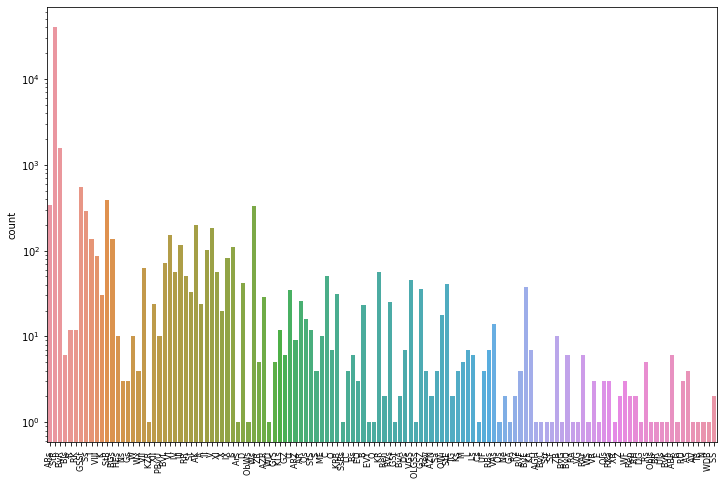

In [106]:
plt.figure(figsize=(12,8))
plt.yscale('log') # Vorsicht bei Interpretation!! nur, damit man die kleinen Vorkommen auch sehen kann..
plt.xticks(rotation=90, fontsize=8)
sns.countplot(all_regz_gruende)

In [107]:
reg_quote_dict = {i: all_regz_gruende.count(i) for i in all_regz_gruende}

In [108]:
reg_quote_dict

{'ARs ': 338,
 'StR ': 40325,
 'BvR ': 1578,
 'BJs ': 6,
 'R ': 12,
 'RK ': 12,
 'GSSt ': 548,
 'Ss ': 286,
 'I ': 135,
 'VIII ': 87,
 'K ': 30,
 'StB ': 393,
 'BGs ': 135,
 'HEs ': 10,
 'Ns ': 3,
 'Gs ': 3,
 'W ': 10,
 'Wx ': 4,
 'VII ': 62,
 'KZR ': 1,
 'XII ': 24,
 'PBvU ': 10,
 'BvL ': 72,
 'VI ': 153,
 'IV ': 57,
 'III ': 117,
 'RR ': 51,
 'St ': 33,
 'AK ': 197,
 'A ': 24,
 'II ': 101,
 'V ': 185,
 'XI ': 57,
 'X ': 20,
 'IX ': 83,
 'Js ': 111,
 'Ars ': 1,
 'D ': 42,
 'ObWs ': 1,
 'Ws ': 329,
 'ZR ': 5,
 'AZR ': 29,
 'WD ': 1,
 'GrS ': 5,
 'KLs ': 12,
 'GZ ': 6,
 'U ': 35,
 'ARZ ': 9,
 'AR ': 26,
 'Qs ': 16,
 'StS ': 12,
 'S ': 4,
 'ME ': 10,
 'C ': 50,
 'O ': 7,
 'KRB ': 31,
 'SsBs ': 1,
 'LC ': 4,
 'Bs ': 6,
 'EO ': 3,
 'B ': 23,
 'EVY ': 1,
 'Q ': 1,
 'KR ': 57,
 'Reh ': 2,
 'RVs ': 25,
 'GSt ': 1,
 'BvA ': 2,
 'Ds ': 7,
 'VGS ': 45,
 'OLGSs ': 1,
 'GSZ ': 36,
 'Rev ': 4,
 'AZN ': 2,
 'Sa ': 4,
 'OWi ': 18,
 'StE ': 41,
 'TG ': 2,
 'Ks ': 4,
 'M ': 5,
 'L ': 7,
 'Ls ': 6,
 'Cs

In [109]:
reg_quote_dict.get("StR ")/sum(reg_quote_dict.values())
# --> in 87% aller als Aktenzeichen erfassten Zitationen ist das Registerzeichen "StR"

0.8695792810471611

alle vorkommenden (erfassten) Registerzeichen in TENOR:

In [111]:
# collect all registerzeichen from TENOR in one list
all_regz_tenor = []
for item in regz_tenor:
    if item:
        all_regz_tenor += item

In [112]:
set(all_regz_tenor)

{'AK ',
 'AR ',
 'ARs ',
 'AZR ',
 'BGs ',
 'BJs ',
 'BvR ',
 'C ',
 'D ',
 'Ds ',
 'GSSt ',
 'GSZ ',
 'I ',
 'II ',
 'IX ',
 'Js ',
 'KA ',
 'KLs ',
 'KRB ',
 'Ks ',
 'Ns ',
 'OGs ',
 'OJs ',
 'Qs ',
 'RVs ',
 'Ss ',
 'SsBs ',
 'St ',
 'StB ',
 'StE ',
 'StR ',
 'T ',
 'V ',
 'VAs ',
 'VGS ',
 'VI ',
 'VII ',
 'Ws ',
 'Wx ',
 'XI '}

<AxesSubplot:ylabel='count'>

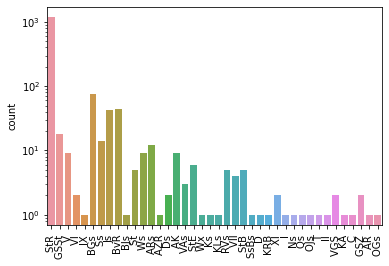

In [113]:
plt.yscale('log')
plt.xticks(rotation=90)
sns.countplot(all_regz_tenor)

## Häufigkeit von Aktenzeichen.

1. Ansatz: alle Zitate berücksichtigen, auch wenn sie mehrfach in einer Rechtsprechung auftauchen

In [144]:
# flatten
def flattenAz(az: list):
    flat_az = []
    if az:
        flat_az = [item for sublist in az for item in sublist]
    return flat_az

In [145]:
# flatten lists of column cited_az_gruende
data_all_az["cited_az_gruende"] = data_all_az["cited_az_gruende"].apply(flattenAz)

In [146]:
data_all_az.cited_az_gruende

0                                          [2 ARs 547/06]
1                                                      []
2                                                      []
3                            [2 StR 375/08, 3 StR 171/09]
4                                           [3 StR 71/05]
                              ...                        
5821    [4 StR 532/92, 2 StR 289/13, 4 StR 16/55, 4 St...
5822    [1 StR 178/13, 5 StR 214/18, 2 StR 150/18, 1 S...
5823    [2 StR 43/13, 3 StR 470/11, 3 StR 137/14, 3 St...
5824                         [3 StR 421/02, 2 StR 231/18]
5825    [2 StR 419/18, 2 StR 13/14, 2 StR 286/15, 2 St...
Name: cited_az_gruende, Length: 5826, dtype: object

In [147]:
# collect all original az in one list "all_cited_az"
all_cited_az = []
for liste in data_all_az.cited_az_gruende:
    if liste:
        all_cited_az += liste        

In [148]:
# entferne Leerzeichen am Anfang
for i, az in enumerate(all_cited_az):
    if az.startswith(" "):
        all_cited_az[i] = az[1:]

In [149]:
all_cited_az

['2 ARs 547/06',
 '2 StR 375/08',
 '3 StR 171/09',
 '3 StR 71/05',
 '4 StR 5/08',
 '5 StR 136/09',
 '1 StR 205/09',
 '5 StR 374/07',
 '2 StR 302/09',
 '5 StR 22/09',
 '4 StR 21/08',
 '4 StR 552/08',
 '3 StR 457/00',
 '1 StR 147/06',
 '1 StR 620/09',
 '2 StR 336/94',
 '2 StR 127/07',
 '4 StR 40/06',
 '3 StR 392/09',
 '3 StR 229/08',
 '4 StR 168/05',
 '4 StR 308/92',
 '4 StR 271/99',
 '4 StR 293/83',
 '4 StR 271/99',
 '4 StR 271/99',
 '4 StR 450/09',
 '4 StR 432/02',
 '4 StR 414/02',
 '1 BvR 256/08',
 '3 StR 36/08',
 '2 BJs 58/06',
 'R 33/02',
 '2 RK 36/86',
 '1 StR 102/03',
 '3 StR 450/07',
 '4 StR 522/87',
 '5 StR 115/99',
 '4 StR 371/08',
 'GSSt 2/56',
 '4 StR 172/73',
 '2 StR 669/81',
 '2 StR 153/02',
 '4 StR 88/98',
 '4 StR 271/99',
 '2 StR 311/05',
 '3 StR 256/04',
 '2 StR 112/10',
 '5 StR 555/08',
 '4 StR 173/96',
 '2 StR 144/05',
 '3 StR 30/03',
 '3 StR 142/03',
 '4 StR 33/88',
 '3 StR 344/03',
 '4 StR 481/07',
 '3 StR 76/10',
 '1 StR 25/03',
 '5 StR 169/09',
 '3 StR 142/91',
 '1

In [150]:
len(all_cited_az)

46457

### Wie oft werden die vorkommenden Aktenzeichen zitiert?
hier wird jedes Zitat einzeln gezählt, egal ob mehrfach in einem Dokument vorkommend, oder verteilt auf unterschiedliche Dokumente

In [151]:
def getDuplicatesWithCount(listOfElems):
    dictOfElems = dict()
    for elem in listOfElems:
        if elem in dictOfElems:
            dictOfElems[elem] += 1
        else:
            dictOfElems[elem] = 1    
    return dictOfElems

In [152]:
dict_all_az = getDuplicatesWithCount(all_cited_az)

In [153]:
dict_all_az

{'2 ARs 547/06': 1,
 '2 StR 375/08': 1,
 '3 StR 171/09': 9,
 '3 StR 71/05': 2,
 '4 StR 5/08': 1,
 '5 StR 136/09': 1,
 '1 StR 205/09': 32,
 '5 StR 374/07': 1,
 '2 StR 302/09': 2,
 '5 StR 22/09': 4,
 '4 StR 21/08': 1,
 '4 StR 552/08': 2,
 '3 StR 457/00': 2,
 '1 StR 147/06': 2,
 '1 StR 620/09': 6,
 '2 StR 336/94': 1,
 '2 StR 127/07': 1,
 '4 StR 40/06': 1,
 '3 StR 392/09': 4,
 '3 StR 229/08': 8,
 '4 StR 168/05': 12,
 '4 StR 308/92': 2,
 '4 StR 271/99': 4,
 '4 StR 293/83': 1,
 '4 StR 450/09': 5,
 '4 StR 432/02': 1,
 '4 StR 414/02': 3,
 '1 BvR 256/08': 21,
 '3 StR 36/08': 3,
 '2 BJs 58/06': 1,
 'R 33/02': 1,
 '2 RK 36/86': 2,
 '1 StR 102/03': 5,
 '3 StR 450/07': 1,
 '4 StR 522/87': 1,
 '5 StR 115/99': 1,
 '4 StR 371/08': 2,
 'GSSt 2/56': 12,
 '4 StR 172/73': 11,
 '2 StR 669/81': 3,
 '2 StR 153/02': 13,
 '4 StR 88/98': 6,
 '2 StR 311/05': 4,
 '3 StR 256/04': 7,
 '2 StR 112/10': 1,
 '5 StR 555/08': 3,
 '4 StR 173/96': 2,
 '2 StR 144/05': 1,
 '3 StR 30/03': 5,
 '3 StR 142/03': 1,
 '4 StR 33/88'

In [154]:
# check sum
sum(dict_all_az.values())

46457

In [155]:
# sort dict descending by value
sorted_dict_all_az = sorted(dict_all_az.items(), key=lambda x: x[1], reverse=True)

In [156]:
sorted_dict_all_az

[('GSSt 1/86', 93),
 ('3 StR 552/08', 92),
 ('4 StR 558/11', 83),
 ('2 BvR 2628/10', 80),
 ('2 BvR 2559/08', 78),
 ('4 StR 215/10', 74),
 ('3 StR 344/03', 71),
 ('GSSt 1/93', 63),
 ('GSSt 1/07', 58),
 ('1 StR 525/11', 58),
 ('1 StR 731/08', 53),
 ('4 StR 502/10', 52),
 ('1 StR 166/07', 52),
 ('2 StR 355/80', 51),
 ('5 StR 119/05', 50),
 ('1 StR 9/90', 50),
 ('3 StR 17/15', 49),
 ('3 StR 247/12', 48),
 ('1 StR 416/08', 47),
 ('2 BvR 2365/09', 47),
 ('1 StR 346/03', 47),
 ('GSSt 1/05', 46),
 ('3 StR 250/09', 46),
 ('4 StR 420/14', 46),
 ('2 BvR 2500/09', 45),
 ('1 StR 586/12', 45),
 ('VGS 1/16', 45),
 ('4 StR 608/11', 44),
 ('2 StR 137/14', 44),
 ('2 StR 374/92', 43),
 ('1 StR 94/98', 43),
 ('1 StR 647/12', 43),
 ('4 StR 439/13', 43),
 ('1 StR 359/13', 42),
 ('1 StR 718/08', 41),
 ('1 StR 45/11', 41),
 ('4 StR 371/13', 40),
 ('3 StR 537/14', 40),
 ('3 StR 269/04', 39),
 ('1 StR 220/09', 39),
 ('1 StR 482/15', 38),
 ('5 StR 181/06', 37),
 ('4 StR 642/96', 37),
 ('5 StR 624/99', 37),
 ('4 

In [159]:
# the 50 most often cited aktenzeichen (in Gruende only)
most_popular_az = dict(sorted_dict_all_az[0:50])

In [160]:
most_popular_az

{'GSSt 1/86': 93,
 '3 StR 552/08': 92,
 '4 StR 558/11': 83,
 '2 BvR 2628/10': 80,
 '2 BvR 2559/08': 78,
 '4 StR 215/10': 74,
 '3 StR 344/03': 71,
 'GSSt 1/93': 63,
 'GSSt 1/07': 58,
 '1 StR 525/11': 58,
 '1 StR 731/08': 53,
 '4 StR 502/10': 52,
 '1 StR 166/07': 52,
 '2 StR 355/80': 51,
 '5 StR 119/05': 50,
 '1 StR 9/90': 50,
 '3 StR 17/15': 49,
 '3 StR 247/12': 48,
 '1 StR 416/08': 47,
 '2 BvR 2365/09': 47,
 '1 StR 346/03': 47,
 'GSSt 1/05': 46,
 '3 StR 250/09': 46,
 '4 StR 420/14': 46,
 '2 BvR 2500/09': 45,
 '1 StR 586/12': 45,
 'VGS 1/16': 45,
 '4 StR 608/11': 44,
 '2 StR 137/14': 44,
 '2 StR 374/92': 43,
 '1 StR 94/98': 43,
 '1 StR 647/12': 43,
 '4 StR 439/13': 43,
 '1 StR 359/13': 42,
 '1 StR 718/08': 41,
 '1 StR 45/11': 41,
 '4 StR 371/13': 40,
 '3 StR 537/14': 40,
 '3 StR 269/04': 39,
 '1 StR 220/09': 39,
 '1 StR 482/15': 38,
 '5 StR 181/06': 37,
 '4 StR 642/96': 37,
 '5 StR 624/99': 37,
 '4 StR 441/78': 36,
 '2 StR 616/10': 36,
 '4 StR 224/12': 36,
 '2 StR 556/96': 36,
 'GSSt 1/

<BarContainer object of 50 artists>

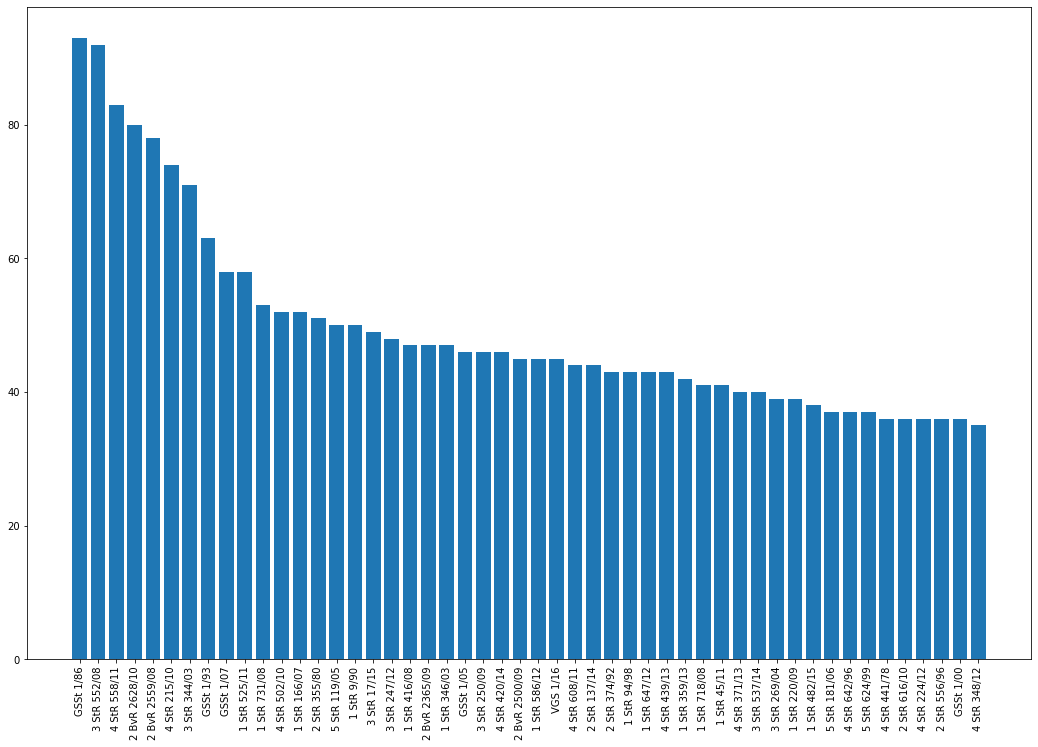

In [161]:
plt.figure(figsize=(18,12))
plt.xticks(rotation=90)
plt.bar(most_popular_az.keys(), most_popular_az.values())

2. Ansatz: pro Dokument jedes Zitat nur einzeln berücksichtigen aka "wird von den meisten Dokumenten zitiert"

In [162]:
# set pro dokument bilden
def setOfAz(az: list):
    return set(az)

In [163]:
data_all_az["set_az_gruende"] = data_all_az["cited_az_gruende"].apply(setOfAz)

In [164]:
# collect all sets of az in one list "all_cited_az_sets"
all_cited_az_sets = []
for menge in data_all_az.set_az_gruende:
    if menge:
        all_cited_az_sets += list(menge)  

In [165]:
len(all_cited_az_sets)

38005

In [166]:
# entferne Leerzeichen am Anfang
for i, az in enumerate(all_cited_az_sets):
    if az.startswith(" "):
        all_cited_az_sets[i] = az[1:]

In [167]:
dict_all_az_sets = getDuplicatesWithCount(all_cited_az_sets)

In [170]:
# sort dict descending by value
sorted_dict_all_az_sets = sorted(dict_all_az_sets.items(), key=lambda x: x[1], reverse=True)

In [171]:
sorted_dict_all_az_sets

[('GSSt 1/86', 81),
 ('3 StR 344/03', 64),
 ('4 StR 558/11', 55),
 ('GSSt 1/93', 54),
 ('2 BvR 2559/08', 51),
 ('1 StR 9/90', 50),
 ('2 BvR 2628/10', 50),
 ('4 StR 215/10', 49),
 ('5 StR 119/05', 45),
 ('GSSt 1/07', 45),
 ('2 StR 355/80', 45),
 ('2 BvR 2365/09', 42),
 ('3 StR 250/09', 42),
 ('2 StR 374/92', 41),
 ('1 StR 94/98', 41),
 ('GSSt 1/05', 39),
 ('4 StR 502/10', 39),
 ('3 StR 552/08', 38),
 ('1 StR 525/11', 38),
 ('2 BvR 2500/09', 36),
 ('4 StR 642/96', 36),
 ('3 StR 247/12', 36),
 ('4 StR 420/14', 36),
 ('1 StR 731/08', 35),
 ('1 StR 647/12', 35),
 ('3 StR 269/04', 34),
 ('4 StR 441/78', 34),
 ('5 StR 521/14', 33),
 ('GSSt 1/00', 33),
 ('1 StR 416/08', 32),
 ('4 StR 608/11', 31),
 ('4 StR 224/12', 30),
 ('1 StR 718/08', 29),
 ('5 StR 492/90', 29),
 ('1 StR 346/03', 29),
 ('1 StR 166/07', 29),
 ('2 StR 90/14', 29),
 ('3 StR 537/14', 29),
 ('1 StR 94/16', 29),
 ('4 StR 439/13', 28),
 ('4 StR 371/13', 28),
 ('2 StR 150/08', 27),
 ('2 StR 139/12', 27),
 ('3 StR 521/15', 27),
 ('2

In [175]:
# the 50 most often cited aktenzeichen (in Gruende only).
# counts appearance per document/gruende once by default
most_popular_az_sets = dict(sorted_dict_all_az_sets[0:50])

In [172]:
# the 20 most often cited aktenzeichen (in Gruende)
most_popular_az_sets_25 = dict(sorted_dict_all_az_sets[0:25])

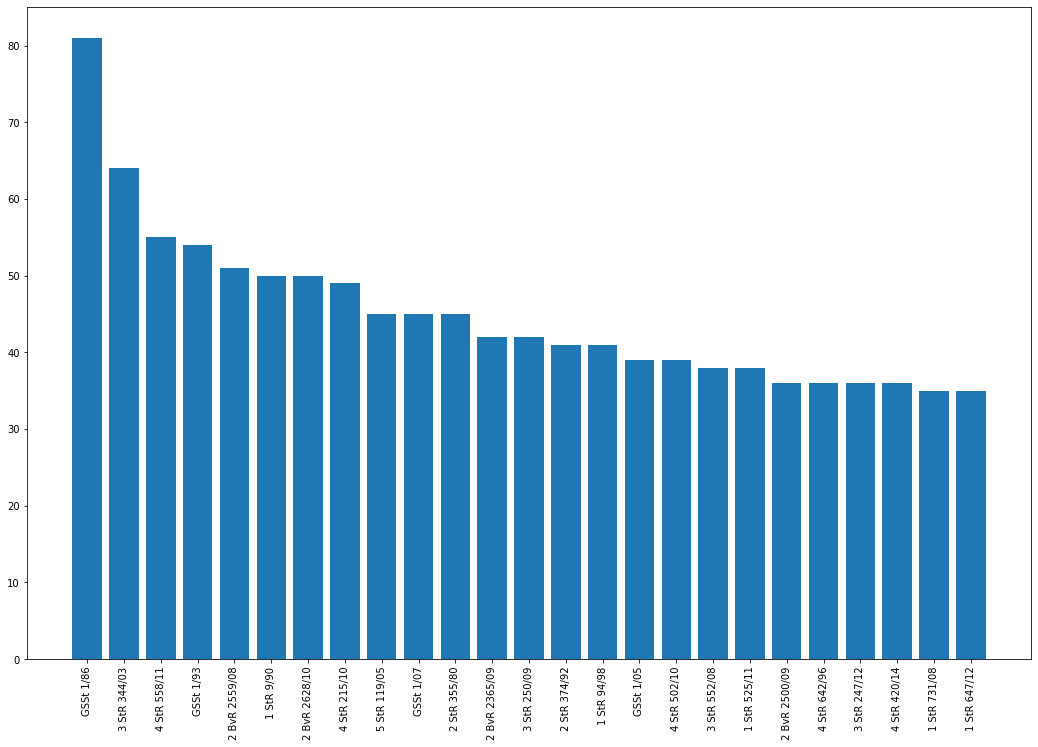

In [173]:
f3_ = plt.figure(figsize=(18,12))
plt.xticks(rotation=90)
plt.bar(most_popular_az_sets_25.keys(), most_popular_az_sets_25.values())
f3_.savefig("images/plots/az_von_meisten_dokumenten_zitiert_25.png", bbox_inches="tight", dpi=600)

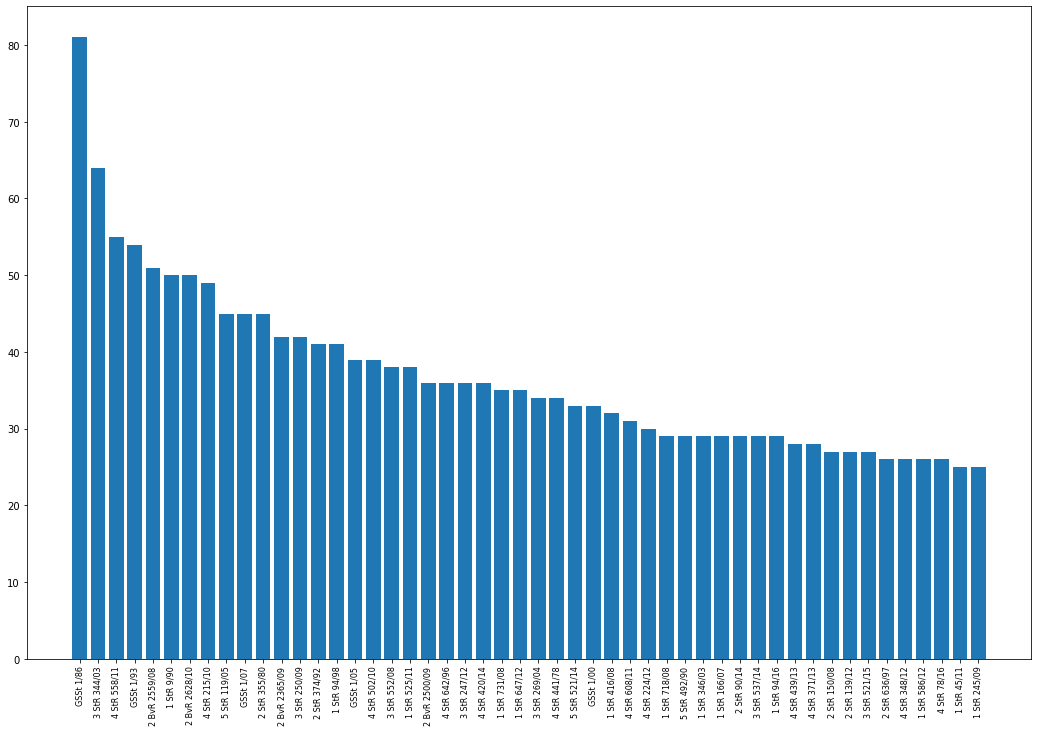

In [176]:
f3 = plt.figure(figsize=(18,12))
plt.xticks(rotation=90, fontsize=8)
plt.bar(most_popular_az_sets.keys(), most_popular_az_sets.values())
f3.savefig("images/plots/az_von_meisten_dokumenten_zitiert_50.png", bbox_inches="tight", dpi=600)

Stichprobenhaft antesten, ob einige der Top-Treffer in Datenmenge als Dokument vorhanden

In [177]:
data_all_az[data_all_az['az'].str.contains('4 StR 558/11')]

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende,citations_gruende,citations_tenor,cited_az_gruende,cited_az_tenor,set_az_gruende
5476,4 StR 558/11,1332374400000,KORE300532012,BGH,4. Strafsenat,Urteil,Bedingter Tötungsvorsatz im Lichte der Hemmsch...,1. Auf die Revision der Staatsanwaltschaft wir...,Das Landgericht hat den Angeklagten wegen gefä...,"[[BGH, Urteile vom 30. März 1995 - 4 StR 725/9...",None,"[4 StR 725/94, 4 StR 471/95, 4 StR 465/76, 4 S...",None,"{VI ZR 309/10, 4 StR 608/11, 5 StR 360/11, 3 S..."


In [178]:
# --> zu alt
data_all_az[data_all_az['az'].str.contains('3 StR 552/08')]

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende,citations_gruende,citations_tenor,cited_az_gruende,cited_az_tenor,set_az_gruende


In [179]:
# falsches Gericht --> Bundesverfassungsgericht
data_all_az[data_all_az['az'].str.contains('2 BvR 2628/10')]

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende,citations_gruende,citations_tenor,cited_az_gruende,cited_az_tenor,set_az_gruende


In [180]:
# vorhanden
data_all_az[data_all_az['az'].str.contains('4 StR 215/10')]

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende,citations_gruende,citations_tenor,cited_az_gruende,cited_az_tenor,set_az_gruende
639,4 StR 215/10,1288224000000,KORE314442010,BGH,4. Strafsenat,Urteil,Beschlagnahme und Verfall: Urteilsfeststellung...,1. Auf die Revisionen der Angeklagten T. und Y...,Das Landgericht hat die Angeklagten T. und Y. ...,"[[BGH, Beschlüsse vom 5. August 2010 - 2 StR 2...",None,"[2 StR 254/10, 3 StR 460/08, 4 StR 393/10, 2 S...",None,"{V ZR 437/99, 3 StR 460/08, 2 StR 254/10, 3 St..."


In [181]:
# auch zu alt
data_all_az[data_all_az['az'].str.contains('3 StR 250/09')]

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende,citations_gruende,citations_tenor,cited_az_gruende,cited_az_tenor,set_az_gruende


In [182]:
# vorhanden
data_all_az[data_all_az['az'].str.match('4 StR 502/10')]

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende,citations_gruende,citations_tenor,cited_az_gruende,cited_az_tenor,set_az_gruende
77,4 StR 502/10,1296086400000,JURE110003769,BGH,4. Strafsenat,Urteil,Besonders schwerer Raub bzw. besonders schwere...,1. Auf die Revision der Staatsanwaltschaft wir...,Das Landgericht hat den Angeklagten A. wegen K...,"[[BGH, Urteil vom 26. September 1984 - 3 StR 3...",None,"[3 StR 367/84, 1 StR 167/77, 3 StR 367/84, 3 S...",None,"{3 StR 367/84, 5 StR 111/90, 1 StR 298/07, 4 S..."


### Zählen, wie viele der zitierten Aktenzeichen/Rechtsprechungen in Korpus als Dokument vorhanden sind

In [183]:
set_all_cited_az = set(all_cited_az)

In [184]:
len(all_cited_az)

46457

In [185]:
len(set_all_cited_az)

14726

In [187]:
# count Aktenzeichen with appearances in more than one document
count_same_az = 0
count_found_once = 0
count_not_found = 0
for az in set_all_cited_az:    
    amount = data_all_az['az'].str.contains(az).sum()
    if amount == 0:
        count_not_found += 1
    if amount == 1:
        count_found_once += 1
    if amount > 1:
        count_same_az += 1    

/home/rosa/ba_recommender/recommender_venv/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [188]:
count_same_az
# ---> in 139 Fällen gibt es mehr als ein zugehöriges Dokument zum Aktenzeichen

139

In [189]:
count_same_az / len(set_all_cited_az)

0.009439087328534565

In [191]:
count_not_found
# --> in 11072 Fällen befindet sich das passende Rechtsprechungsdokument nicht im Korpus

11072

In [192]:
count_not_found / len(set_all_cited_az)

0.751867445334782

In [193]:
count_found_once
# --> in 3515 Fällen kann das zitierte Dokument im Datensatz aufgelöst werden

3515

In [194]:
count_found_once / len(set_all_cited_az)
# --> ~24% der insgesamt vorkommenden unterschiedlichen Aktenzeichen können einem Dokument im Korpus zugeordnet werden

0.23869346733668342

### Datum zusätzlich zu Aktenzeichen aus Zitaten extrahieren,
um korrekte Zuordbarkeit bei mehrfach vorkommenden Aktenzeichen zu schaffen

In [195]:
# wenn Aktenzeichen vorhanden in Zitation, steht zuvor eigentlich immer das Datum in der Form 8.Oktober 2010
# Vorgehen: alle Az extrahieren, wenn möglich mit Datum. Falls kein Datum, trotzdem Az speichern

In [186]:
# Regex für Datum
rs_datum = re.compile("\d{1,2}\.\s[J|F|M|A|S|O|N|D][a-zä]{2,}\s[1|2]\d{3}")

In [185]:
def extractAktenzeichenWithDate(citation_list: list):
    if citation_list:
        azs = []
        for item in citation_list:
            # date
            date = rs_datum.findall(item[0])
            # long with parantheses
            al = rs_citation_standard_extra.findall(item[0])
            if al:
                # cut date to length of al list
                date = date[:len(al)]
                azs.append((al, date))
            # standard
            az = rs_citation_standard.findall(item[0])
            if az:
                # cut date to length of az list
                date = date[:len(az)]
                azs.append((az, date))
            # roman
            azr = rs_citation_roman.findall(item[0])
            if azr:
                # cut date to length of azs list
                date = date[:len(azr)]
                azs.append((azr, date))
            # ohne vorangehende Ziffer
            if not az and not azr:
                azsp = rs_citation_special.findall(item[0])
                if azsp:
                    # cut date to length of azsp list
                    date = date[:len(azsp)]
                    
                    # remove space at beginning
                    for i, a in enumerate(azsp):
                        if a.startswith(" "):
                            azsp[i] = a[1:]
                    
                    azs.append((azsp, date))
        return azs
    else:
        return None

In [199]:
# apply extractAktenzeichenWithDate on df data_all_az
data_all_az["cited_az_gruende_date"] = data_all_az["citations_gruende"].apply(extractAktenzeichenWithDate)

In [204]:
# test on one date
data_all_az.citations_gruende.iloc[256]

[['BGH, Beschluss vom 21. Juli 2006 - 2 ARs 302/06, NStZ-RR 2007, 94',
  2672,
  2737],
 ['BGH, Beschluss vom 14. August 1981 - 2 ARs 174/81, BGHSt 30, 189',
  3173,
  3237],
 ['Beschluss vom 11. Juli 2012 - 2 ARs 164/12', 3239, 3281],
 ['BGH, Beschluss vom 14. August 1981 - 2 ARs 174/81, BGHSt 30, 189',
  4096,
  4160],
 ['BGH, Beschluss vom 21. Dezember 2010 - 2 ARs 441/10, BGH, Beschluss vom 11. Juli 2012 - 2 ARs 164/12, KK-StPO-Appl 6. Auflage 2008 § 462a',
  4162,
  4299],
 ['OLG Düsseldorf NStZ 1982, 47', 5261, 5289],
 ['BGH, Beschluss vom 22. November 2000 - 2 ARs 302/00, KK-StPO-Appl 6. Auflage 2008 § 462a',
  5534,
  5622]]

In [203]:
data_all_az.cited_az_gruende[256]

['2 ARs 302/06',
 '2 ARs 174/81',
 '2 ARs 164/12',
 '2 ARs 174/81',
 '2 ARs 441/10',
 '2 ARs 164/12',
 '2 ARs 302/00']

In [1299]:
data_all_az.cited_az_gruende_date.iloc[256]

[(['2 ARs 302/06'], ['21. Juli 2006']),
 (['2 ARs 174/81'], ['14. August 1981']),
 (['2 ARs 164/12'], ['11. Juli 2012']),
 (['2 ARs 174/81'], ['14. August 1981']),
 (['2 ARs 441/10', '2 ARs 164/12'], ['21. Dezember 2010', '11. Juli 2012']),
 (['2 ARs 302/00'], ['22. November 2000'])]

In [1301]:
# save
data_all_az.to_json("data/dataframes/df_all_az_date.json")

In [206]:
# load
data_all_citations = pd.read_json('data/dataframes/df_all_az_date.json', orient='columns', encoding='utf-8')

In [191]:
def flatAzWithDate(az_date: list):
    if az_date:
        citlis = []
        for citation in az_date:
            # one quote in list
            if len(citation[0]) == 1:
                # no date given
                if not citation[1]:                    
                    citlis.append((citation[0][0], None))
                else:
                    citlis.append((citation[0][0], citation[1][0]))
            # more than one quote
            else:
                # list of citations and list of dates of same length
                if len(citation[0])==len(citation[1]):
                    zipped = zip(citation[0], citation[1])
                    zipped = list(zipped)
                    for z in zipped:
                        citlis.append(z)
                # list of citations with more items than list of dates                
                if len(citation[0])>len(citation[1]):
                    # date list contains at least 1 date
                    # auffüllen und dann zippen
                    if citation[1]:
                        citation1 = list(citation[1]) * len(citation[0])
                        zipped = zip(citation[0], citation1)
                        zipped = list(zipped)
                        for z in zipped:
                            citlis.append(z)
                    # date list is empty
                    if not citation[1]:
                        citation1 = [None] * len(citation[0])
                        zipped = zip(citation[0], citation1)
                        zipped = list(zipped)
                        for z in zipped:
                            citlis.append(z)                        
                    
        return citlis

In [209]:
# before applying function
data_all_citations.cited_az_gruende_date.iloc[389]

[[['2 StR 137/14'], []],
 [['2 StR 337/14'], []],
 [['2 StR 137/14', '2 StR 337/14'], ['8. Oktober 2014']],
 [['2 StR 137/14'], []],
 [['2 StR 337/14'], []],
 [['III ZR 340/51'], ['29. September 1952']],
 [['GZ 1/55'], ['6. Juli 1955']],
 [['VI ZR 112/60'], ['16. Mai 1961']],
 [['III ZR 48/63'], ['13. Januar 1964']],
 [['VI ZR 137/63', 'VI ZR 139/63'], ['25. September 1964']],
 [['VI ZR 29/92'], ['16. Februar 1993']],
 [['VI ZB 26/05'], ['10. Januar 2006']],
 [['VI ZB 27/05', 'VI ZB 28/05'], []],
 [['4 U 165/13'], ['28. Mai 2014']],
 [['0 U 4757/13'], ['11. April 2014']],
 [['2 StR 151/98'], ['26. August 1998']],
 [['2 StR 503/13'], ['5. März 2014']],
 [['3 StR 478/92'], ['30. Oktober 1992']],
 [['3 StR 602/98'], ['5. Januar 1999']],
 [['3 StR 325/14'], ['2. September 2014']],
 [['4 StR 217/14'], ['18. Juni 2014']],
 [['3 StR 478/92'], ['30. Oktober 1992']],
 [['2 StR 232/93'], ['9. Juni 1993']],
 [['1 StR 668/94'], ['7. Februar 1995']],
 [['3 StR 338/95'], ['27. September 1995']],
 [[

In [210]:
# apply flatAzWithDate on df
data_all_citations["cited_az_gruende_date_flat"] = data_all_citations["cited_az_gruende_date"].apply(flatAzWithDate)

In [211]:
# after applying flatAzWithDate
data_all_citations.cited_az_gruende_date_flat[389]

[('2 StR 137/14', None),
 ('2 StR 337/14', None),
 ('2 StR 137/14', '8. Oktober 2014'),
 ('2 StR 337/14', '8. Oktober 2014'),
 ('2 StR 137/14', None),
 ('2 StR 337/14', None),
 ('III ZR 340/51', '29. September 1952'),
 ('GZ 1/55', '6. Juli 1955'),
 ('VI ZR 112/60', '16. Mai 1961'),
 ('III ZR 48/63', '13. Januar 1964'),
 ('VI ZR 137/63', '25. September 1964'),
 ('VI ZR 139/63', '25. September 1964'),
 ('VI ZR 29/92', '16. Februar 1993'),
 ('VI ZB 26/05', '10. Januar 2006'),
 ('VI ZB 27/05', None),
 ('VI ZB 28/05', None),
 ('4 U 165/13', '28. Mai 2014'),
 ('0 U 4757/13', '11. April 2014'),
 ('2 StR 151/98', '26. August 1998'),
 ('2 StR 503/13', '5. März 2014'),
 ('3 StR 478/92', '30. Oktober 1992'),
 ('3 StR 602/98', '5. Januar 1999'),
 ('3 StR 325/14', '2. September 2014'),
 ('4 StR 217/14', '18. Juni 2014'),
 ('3 StR 478/92', '30. Oktober 1992'),
 ('2 StR 232/93', '9. Juni 1993'),
 ('1 StR 668/94', '7. Februar 1995'),
 ('3 StR 338/95', '27. September 1995'),
 ('3 StR 346/14', '2. Septe

### convert dates of az / documents

In [212]:
# before conversion
data_all_citations.datum

0       1263340800000
1       1263340800000
2       1264464000000
3       1264464000000
4       1264032000000
            ...      
5821    1506556800000
5822    1573603200000
5823    1572912000000
5824    1573603200000
5825    1565827200000
Name: datum, Length: 5826, dtype: int64

In [213]:
def convertDatum(datum: int):
    datum = datum//1000
    return datetime.datetime.utcfromtimestamp(datum).strftime('%Y%m%d')    

In [214]:
# apply convertDatum on df
data_all_citations["datum"] = data_all_citations["datum"].apply(convertDatum)

In [215]:
# after date conversion --> readable
data_all_citations.datum

0       20100113
1       20100113
2       20100126
3       20100126
4       20100121
          ...   
5821    20170928
5822    20191113
5823    20191105
5824    20191113
5825    20190815
Name: datum, Length: 5826, dtype: object

### convert dates extracted from citations

In [227]:
# example date
bsp_datum = data_all_citations.cited_az_gruende_date_flat[0][0][1]
bsp_datum
# ist: '7. Februar 2007'
# soll: 20070207

'7. Februar 2007'

In [215]:
# regex patterns for date
re_month = re.compile("[J|F|M|A|S|O|N|D][a-zä]{2,}")
re_day = re.compile("\d{1,2}\.")
re_year = re.compile("[1|2]\d{3}")

In [216]:
def convertMonth(month: str):
        months={
                "Januar":'01',
                "Februar":'02',
                "März":'03',
                "April":'04',
                "Mai":'05',
                "Juni":'06',
                "Juli":'07',
                "August": "08",
                "September": "09",
                "Oktober": "10",
                "November": "11",
                "Dezember": "12"         
                }
        return months.get(month,"Invalid month")    

In [214]:
def convertDate(datum: str):
    year = re_year.findall(datum)[0]
    month = re_month.findall(datum)[0]
    day = re_day.findall(datum)[0]
    # convert month
    m = convertMonth(month)    
    # convert day
    d = day[:len(day)-1]
    if int(d) < 10:
        d = str(0) + d
    return year+m+d

In [213]:
def convertDateFromCitation(cit_tup_list: list):
    if cit_tup_list:
        new_tup_list = []
        for tupel in cit_tup_list:
            if tupel[1]:
                tupel_2 = list(tupel)
                tupel_2[1] = convertDate(tupel[1])
                tupel = tuple(tupel_2)
                new_tup_list.append(tupel)
            else:
                new_tup_list.append(tupel)
        return new_tup_list    

In [225]:
# apply date conversion on cited_az_gruende_date_flat
data_all_citations["cited_az_gruende_date_converted"] = data_all_citations["cited_az_gruende_date_flat"].apply(convertDateFromCitation)

In [229]:
data_all_citations.cited_az_gruende_date_converted.iloc[256]

[('2 ARs 302/06', '20060721'),
 ('2 ARs 174/81', '19810814'),
 ('2 ARs 164/12', '20120711'),
 ('2 ARs 174/81', '19810814'),
 ('2 ARs 441/10', '20101221'),
 ('2 ARs 164/12', '20120711'),
 ('2 ARs 302/00', '20001122')]

## Herausfinden, wie viele Zitate zuordbar sind zu Dokumenten in vorhandender Datenmenge. Verbindungen zwischen vorhandenen Dokumenten und zitierten Dokumenten finden

In [230]:
def analyseCitationMatches(tup_list: list):   
    count_same_az_ = 0
    count_not_found = 0
    count_ambiguous = 0
    for tup in tup_list:
        amount = data_all_citations['az'].str.match(tup[0]).sum()        
        if amount > 1:
            # additionally check for date --> convert dates to same format
            occurrences = len(data_all_citations[data_all_citations['az'].str.match(tup[0])].index)
            idxs = data_all_citations[data_all_citations['az'].str.match(tup[0])].index
            statement = "found " + str(occurrences) + " times: " + str(tup) + " at " + str(idxs)
            print(statement)
            count_ambiguous += 1   
        if amount == 1:
            print("found once: ", tup[0])
            count_same_az_ += 1
        if amount == 0:
            print("not found: ", tup[0])
            count_not_found += 1
    return count_same_az_, count_not_found, count_ambiguous

In [231]:
# try an example
tl = data_all_citations.cited_az_gruende_date_converted[5822]

In [232]:
analyseCitationMatches(tl)

found once:  1 StR 178/13
found once:  5 StR 214/18
found once:  2 StR 150/18
found once:  1 StR 551/17
not found:  2 BvR 930/04
found once:  1 StR 76/17
found once:  3 StR 417/15
found once:  3 StR 214/15
found once:  2 StR 460/16
found once:  2 StR 214/16
not found:  1 StR 577/05
not found:  1 StR 213/04
found once:  3 StR 214/15
found once:  3 StR 417/15
found 2 times: ('3 StR 452/18', '20190320') at Int64Index([4726, 5574], dtype='int64')
found once:  2 StR 376/12
found once:  2 StR 320/15
found once:  2 StR 413/13
found once:  1 StR 239/17
found once:  2 StR 278/09
not found:  3 StR 176/80


(16, 4, 1)

In [1334]:
# look at '3 StR 452/18' (found twice)
data_all_citations[data_all_citations['az'].str.match('3 StR 452/18')]
# --> same az and same date..!

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende,citations_gruende,citations_tenor,cited_az_gruende,cited_az_tenor,set_az_gruende,cited_az_gruende_date,cited_az_gruende_date_flat,cited_az_gruende_date_converted
4726,3 StR 452/18,20190320,KORE605192019,BGH,3. Strafsenat,Beschluss,Berücksichtigung des Erziehungsgedankens bei A...,1. Auf die Revision des Angeklagten wird das U...,Das Landgericht hat den Angeklagten wegen beso...,"[[BGH, Beschluss vom 20. März 2019 - 3 StR 452...",None,"[3 StR 452/18, 1 StR 76/17, 3 StR 417/15, 3 St...",None,"[2 StR 150/18, 1 StR 95/16, 2 StR 460/16, 1 St...","[[[3 StR 452/18], [20. März 2019]], [[1 StR 76...","[(3 StR 452/18, 20. März 2019), (1 StR 76/17, ...","[(3 StR 452/18, 20190320), (1 StR 76/17, 20170..."
5574,3 StR 452/18,20190320,KORE605182019,BGH,3. Strafsenat,Beschluss,Verfahrenseröffnung: Anforderungen an die rich...,1. Auf die Revision des Angeklagten wird das U...,Das Landgericht hat den Angeklagten wegen beso...,"[[BGH, Urteil vom 7. Januar 1959 - 2 StR 550/5...",None,"[2 StR 550/58, 1 StR 377/88]",None,"[1 StR 377/88, 2 StR 550/58]","[[[2 StR 550/58], [7. Januar 1959]], [[1 StR 3...","[(2 StR 550/58, 7. Januar 1959), (1 StR 377/88...","[(2 StR 550/58, 19590107), (1 StR 377/88, 1988..."


In [233]:
# another example
analyseCitationMatches(data_all_citations.cited_az_gruende_date_converted[822])

found once:  1 StR 104/15
found once:  1 StR 220/09
found once:  2 StR 111/09
not found:  2 StR 587/07
found once:  2 StR 111/09
found once:  3 StR 90/10
found once:  2 StR 111/09
found once:  3 StR 265/14
found once:  1 StR 540/16
found once:  1 StR 220/09
found once:  1 StR 532/12
not found:  5 StR 119/05
found once:  4 StR 345/09
not found:  5 StR 299/03
not found:  5 StR 299/03
found once:  3 StR 265/14
found once:  1 StR 220/09
not found:  4 StR 571/74
found once:  5 StR 182/14
found once:  1 StR 220/09
not found:  2 BvR 1235/11
not found:  2 BvR 2559/08
not found:  2 BvR 1235/11
not found:  2 BvR 2559/08
found once:  1 StR 94/10
found once:  1 StR 220/09
found once:  2 StR 591/11
found 2 times: ('3 StR 17/15', '20151126') at Int64Index([1545, 3568], dtype='int64')
found once:  2 StR 111/09
found once:  1 StR 104/15
found once:  2 StR 111/09
not found:  2 StR 587/07
found once:  2 StR 111/09
found once:  2 StR 111/09
not found:  2 StR 587/07
not found:  4 StR 59/04
found once:  2 

(32, 20, 1)

In [234]:
# look at '3 StR 17/15' (found twice)
data_all_citations[data_all_citations['az'].str.match('3 StR 17/15')]
# --> same az, different date
# hier ist das ältere Dokument mit Index 3568 gemeint

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende,citations_gruende,citations_tenor,cited_az_gruende,cited_az_tenor,set_az_gruende,cited_az_gruende_date,cited_az_gruende_date_flat,cited_az_gruende_date_converted
1545,3 StR 17/15,20160628,JURE160014078,BGH,3. Strafsenat,Beschluss,Rechtliches Gehör im Strafverfahren: Hinweis d...,Die Anhörungsrüge des Verurteilten gegen den S...,Der Senat hat mit Beschluss vom 26. November 2...,"[[BVerfG, Beschlüsse vom 21. Januar 2002 - 2 B...",None,"[2 BvR 1225/01, 2 BvR 792/11, 3 StR 95/12, 1 B...",None,"[1 BvR 1383/90, 3 StR 95/12, 1 StR 215/01, 2 B...","[[[2 BvR 1225/01], [21. Januar 2002]], [[2 BvR...","[(2 BvR 1225/01, 21. Januar 2002), (2 BvR 792/...","[(2 BvR 1225/01, 20020121), (2 BvR 792/11, 201..."
3568,3 StR 17/15,20151126,KORE303732016,BGH,3. Strafsenat,Beschluss,Untreue: Vermögensbetreuungspflicht eines Mitg...,1. Auf die Revisionen der Angeklagten wird das...,Das Landgericht hat den Angeklagten D. unter F...,"[[BGH, Beschlüsse vom 1. April 2008 - 3 StR 49...",None,"[3 StR 493/07, 1 StR 220/09, 4 StR 156/11, 3 S...",None,"[1 StR 731/08, 1 StR 544/90, 1 StR 755/75, XI ...","[[[3 StR 493/07], [1. April 2008]], [[1 StR 22...","[(3 StR 493/07, 1. April 2008), (1 StR 220/09,...","[(3 StR 493/07, 20080401), (1 StR 220/09, 2010..."


In [235]:
def countCitationMatches(tup_list: list): 
    if tup_list:
        count_same_az_ = 0
        count_not_found = 0
        count_ambiguous = 0
        for tup in tup_list:
            amount = data_all_citations['az'].str.contains(tup[0]).sum()
            datum1 = tup[1]
            if amount > 1:
                count_ambiguous += 1
            if amount == 1:
                count_same_az_ += 1
            if amount == 0:
                count_not_found += 1
        return {"found": count_same_az_, "not found": count_not_found, "ambiguous": count_ambiguous}

In [236]:
# test countCitationMatches on example from above (document with index 5822)
countCitationMatches(tl)

{'found': 16, 'not found': 4, 'ambiguous': 1}

In [240]:
# apply countCitationMatches on df
# processing takes a while; better load directly from df (s. 2 cells further down)
data_all_citations["matches_gruende"] = data_all_citations["cited_az_gruende_date_converted"].apply(countCitationMatches)

In [1340]:
# save
data_all_citations.to_json("data/dataframes/df_citations_matches.json")

In [4]:
# load
data_citations_matches = pd.read_json('data/dataframes/df_citations_matches.json', orient='columns', encoding='utf-8')

### Statistics of overall matches

In [241]:
data_citations_matches.matches_gruende

0        {'found': 0, 'not found': 1, 'ambiguous': 0}
1                                                None
2                                                None
3        {'found': 0, 'not found': 2, 'ambiguous': 0}
4        {'found': 0, 'not found': 1, 'ambiguous': 0}
                            ...                      
5821     {'found': 5, 'not found': 9, 'ambiguous': 0}
5822    {'found': 16, 'not found': 4, 'ambiguous': 1}
5823     {'found': 4, 'not found': 1, 'ambiguous': 1}
5824     {'found': 1, 'not found': 1, 'ambiguous': 0}
5825     {'found': 5, 'not found': 1, 'ambiguous': 0}
Name: matches_gruende, Length: 5826, dtype: object

In [13]:
all_matches_gruende = data_citations_matches.matches_gruende.tolist()

In [14]:
# sum the values with same keys 
sum_matches_gruende = dict(functools.reduce(operator.add, map(collections.Counter, all_matches_gruende))) 

In [15]:
sum_matches_gruende

{'not found': 29019, 'found': 16272, 'ambiguous': 1166}

<AxesSubplot:>

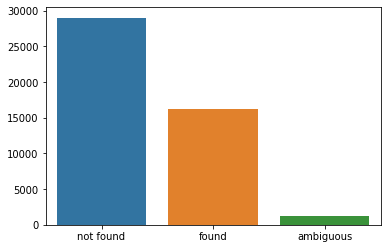

In [245]:
sns.barplot(list(sum_matches_gruende.keys()), list(sum_matches_gruende.values()))

In [18]:
sum_az = sum_matches_gruende.get("not found") + sum_matches_gruende.get("found") + sum_matches_gruende.get("ambiguous")
sum_az

46457

In [16]:
# davon ausgehend, dass ambiguous zuordbar ist:
found = sum_matches_gruende.get("found") + sum_matches_gruende.get("ambiguous")

In [19]:
found/sum_az
# --> 37,5% aller aus Zitaten extrahierten Aktenzeichen (Gründe) sind in Dokumentenmenge auffindbar

0.3753578578039908

### Wie viele Zitate gibt es insgesamt in Gründe?

In [20]:
citations_gruende_list = data_citations_matches.citations_gruende.tolist()

In [21]:
def countAmountCitations(citlist: list):
    if citlist:
        return len(citlist)
    else:
        return 0

In [22]:
# apply countAmountCitations on df
data_citations_matches["amount_cit_gruende"] = data_citations_matches.citations_gruende.apply(countAmountCitations)

In [23]:
data_citations_matches.citations_gruende.iloc[6]

[['BGH NJW 1980, 2423', 2452, 2470],
 ['NStZ 1985, 184', 2472, 2486],
 ['Senat, Urt. vom 20. März 2008 - 4 StR 5/08', 2529, 2571],
 ['BGH, Beschl. vom 9. November 2009 - 5 StR 136/09', 4696, 4744],
 ['BGH, Urt. vom 28. Oktober 2009 - 1 StR 205/09 Rdn.', 5317, 5367]]

In [24]:
data_citations_matches.amount_cit_gruende.iloc[6]

5

In [25]:
sum_citations = data_citations_matches.amount_cit_gruende.sum(axis=0, skipna=True)
sum_citations

52699

In [26]:
found/sum_citations
# --> 33% aller aus Gründen extrahierten Zitate sind Dokumenten in Korpus zuordbar

0.33089811950890907

### Wie viele Aktenzeichen werden aus den Zitaten extrahiert?

In [27]:
def countAmountAz(azlist: list):
    if azlist: 
        return len(azlist)
    else:
        return 0    

In [28]:
data_citations_matches["amount_az_gruende"] = data_citations_matches.cited_az_gruende.apply(countAmountAz)

In [29]:
sum_aktenz = data_citations_matches.amount_az_gruende.sum(axis=0, skipna=True)
sum_aktenz

46457

In [30]:
sum_aktenz/sum_citations
#--> 88,16% der Zitate werden aufgelöst in Aktenzeichen

0.8815537296722898

In [31]:
# az mit datum:
# --> berücksichtigt jeweils einzeln, wenn mehrere Aktenzeichen in einem Zitat vorkommen (wurde geflatted)
data_citations_matches["amount_az_date_gruende"] = data_citations_matches.cited_az_gruende_date_converted.apply(countAmountCitations)

In [32]:
data_citations_matches.amount_az_date_gruende.sum()

46457

In [33]:
sum_az/sum_citations
# --> 88,16% der Zitate werden in Aktenzeichen aufgelöst

0.8815537296722898

### Wie einzigartig sind die doknr?

In [34]:
len(data_citations_matches.doknr.unique())
# --> doknr sind 100% eindeutig!

5826

### Wie einzigartig sind die az?

In [35]:
len(data_citations_matches.az.unique())
# --> nicht eindeutig! es gibt mehrfache Vorkommen (die sich immer auf denselben Fall beziehen),
# aber mehrere Entscheidungen mit sich bringen.
# Bestätigt Feststellung von oben, dass eindeutige Zuordbarkeit teils nur unter Hinzunahme von Datum
# möglich ist

5640

# Matching Algorithmus

In [52]:
# ALT
def getCitationMatches(tup_list: list): 
    if tup_list:
        doknr_list = []
        
        for tup in tup_list:
            amount = data_citations_matches['az'].str.contains(tup[0]).sum()
            datum1 = tup[1]
            # mehr als ein Dokument mit Az in Korpus
            if amount > 1:
                # additionally check for date 
                idxs = data_citations_matches[data_citations_matches['az'].str.contains(tup[0])].index.values
                
                # zähle Treffer mit korrektem Datum
                count_date_match = 0
                for idx in idxs:
                    datum2 = data_citations_matches.datum[idx]
                    if datum2 == datum1:
                        count_date_match += 1
                # genau ein Datumstreffer
                if count_date_match == 1:
                    # take document with correct date
                    doknr = data_citations_matches.loc[data_citations_matches['az'].str.contains(tup[0]) & (data_citations_matches['datum'] == datum1)].doknr.values[0]
                    doknr_list.append(doknr)
                # kein oder mehr als ein Datumstreffer
                else:
                    # take document with correct az with most citations
                    citations = []
                    for idx in idxs:
                        if data_citations_matches.citations_gruende[idx]:
                            cit_len = (idx, len(data_citations_matches.citations_gruende[idx]))
                        else:
                            cit_len = (idx, 0)
                        citations.append(cit_len)
                        
                    max_cit = max(citations, key=lambda x:x[1])
                    max_cit_idx = max_cit[0]
                    doknr = data_citations_matches.doknr[max_cit_idx]
                    doknr_list.append(doknr)

            # ein Dokument mit Az in Korpus
            if amount == 1:
                # get doknr from matching document
                doknr = data_citations_matches[data_citations_matches['az'].str.contains(tup[0])].doknr.values[0]
                doknr_list.append(doknr)
            
        return doknr_list

In [53]:
# test function getCitationMatches
test_list = data_citations_matches.cited_az_gruende_date_converted[4906]
print(test_list)
getCitationMatches(test_list)

[['1 StR 527/18', '20181108'], ['1 StR 115/04', '20040707'], ['5 StR 50/17', '20180828'], ['2 StR 112/14', '20160324']]


['KORE632172018', 'KORE305562018', 'JURE160008164']

In [ ]:
# nachdem in Netz einige Cycles festgestellt wurden: Änderung der CitationMatches-Funktion. 
# --> Datum wird jetzt immer einbezogen
# --> hierdurch wird sich die Gesamtmenge reduzieren, da nicht alle Zitate ein Datum nennen

In [40]:
data_citations_matches.cited_az_gruende_date_converted[2100]

[['4 StR 215/10', '20101028'],
 ['1 StR 75/11', '20110315'],
 ['4 StR 215/10', '20101028']]

In [323]:
# NEU
def getCitationMatchesWithDate(tup_list: list, self_doknr: str): 
    if tup_list:
        doknr_list = []
        
        for tup in tup_list:
            # how often does az exist in corpus
            amount = data_citations_matches['az'].str.contains(tup[0]).sum()
            datum = tup[1]
            # convert datum to int to make comparable
            if datum:
                datum = int(datum)
            else:
                datum = -1
                
            own_index = data_citations_matches[data_citations_matches.doknr==self_doknr].index.values
            
            # mehr als ein Dokument mit Az in Korpus
            if amount > 1 and datum != -1:
                # get indizes 
                idxs = data_citations_matches[data_citations_matches['az'].str.contains(tup[0])].index.values
                     
                # zähle Treffer mit korrektem Datum
                count_date_match = 0
                possible_targets = []
                for idx in idxs:
                    datum2 = data_citations_matches.datum[idx]
                    if datum2 == datum:
                        count_date_match += 1
                        possible_targets.append(idx)
                
                # prevent self-quotation
                if own_index in possible_targets:
                    possible_targets.remove(own_index)
        
                # genau ein Datumstreffer
                if count_date_match == 1:
                    # take document with correct date
                    doknr = data_citations_matches.loc[data_citations_matches['az'].str.contains(tup[0]) & (data_citations_matches['datum'] == datum)].doknr.values[0]
                    # prevent self-quotation
                    if self_doknr != doknr:
                        doknr_list.append(doknr)
                        
                # mehr als ein Datumstreffer
                if count_date_match > 1:
                    # take document with correct az with most citations
                    citations = []
                    #for idx in idxs:
                    for target in possible_targets:                        
                        if data_citations_matches.citations_gruende[target]:
                            cit_len = (target, len(data_citations_matches.citations_gruende[target]))
                        else:
                            cit_len = (target, 0)
                        citations.append(cit_len)
                        
                    max_cit = max(citations, key=lambda x:x[1])
                    max_cit_idx = max_cit[0]
                    doknr = data_citations_matches.doknr[max_cit_idx]
                    doknr_list.append(doknr)
                    

                
            # ein Dokument mit Az in Korpus
            if amount == 1 and datum != -1:
                az = tup[0]
              
                idx = data_citations_matches[data_citations_matches['az'].str.contains(az)].index.values[0]
                
                # get doknr from matching document with datum check
                if data_citations_matches.loc[idx].datum == datum and idx != own_index:
                    doknr = data_citations_matches.loc[idx].doknr
                    doknr_list.append(doknr)
                    
            
        return doknr_list

In [329]:
# test function getCitationMatchesWithDate for JURE140020456 / index 389
# 389
# special case: 2 az, different date

test_list = data_citations_matches.cited_az_gruende_date_converted[389]
print(test_list)
getCitationMatchesWithDate(test_list, "JURE140020456")

[['2 StR 137/14', None], ['2 StR 337/14', None], ['2 StR 137/14', '20141008'], ['2 StR 337/14', '20141008'], ['2 StR 137/14', None], ['2 StR 337/14', None], ['III ZR 340/51', '19520929'], ['GZ 1/55', '19550706'], ['VI ZR 112/60', '19610516'], ['III ZR 48/63', '19640113'], ['VI ZR 137/63', '19640925'], ['VI ZR 139/63', '19640925'], ['VI ZR 29/92', '19930216'], ['VI ZB 26/05', '20060110'], ['VI ZB 27/05', None], ['VI ZB 28/05', None], ['4 U 165/13', '20140528'], ['0 U 4757/13', '20140411'], ['2 StR 151/98', '19980826'], ['2 StR 503/13', '20140305'], ['3 StR 478/92', '19921030'], ['3 StR 602/98', '19990105'], ['3 StR 325/14', '20140902'], ['4 StR 217/14', '20140618'], ['3 StR 478/92', '19921030'], ['2 StR 232/93', '19930609'], ['1 StR 668/94', '19950207'], ['3 StR 338/95', '19950927'], ['3 StR 346/14', '20140902'], ['VI ZR 201/91', '19921013'], ['VI ZR 182/97', '19980512'], ['III ZR 340/51', '19520929'], ['GZ 1/55', '19550706'], ['III ZR 340/51', '19520929'], ['III ZR 340/51', '19520929']

['JURE140020475', 'JURE140007283', 'JURE140016147', 'JURE140016149']

In [330]:
# test function getCitationMatchesWithDate for 4906 / KORE624312019
# standard case

test_list = data_citations_matches.cited_az_gruende_date_converted[4906]
print(test_list)
getCitationMatchesWithDate(test_list, "KORE624312019")

[['1 StR 527/18', '20181108'], ['1 StR 115/04', '20040707'], ['5 StR 50/17', '20180828'], ['2 StR 112/14', '20160324']]


['KORE632172018', 'KORE305562018', 'JURE160008164']

In [331]:
# test function getCitationMatchesWithDate for document with index 1043 / JURE100068632
# edge case 1: az 1 StR 166/07 exists but with different date

test_list = data_citations_matches.cited_az_gruende_date_converted[1043]
print(test_list)
getCitationMatchesWithDate(test_list, "JURE100068632")

[['2 BvR 1871/08', None], ['5 StR 482/05', '20060629'], ['2 BvR 527/06', '20060707'], ['1 StR 166/07', '20080530']]


[]

In [332]:
# test function getCitationMatchesWithDate for document with index 822 / KORE619192019
# edge case 2: az 3 StR 17/15 exists twice but with two different dates
# (JURE160014078 vs KORE303732016 (= correct))

test_list = data_citations_matches.cited_az_gruende_date_converted[822]
print(test_list)
getCitationMatchesWithDate(test_list, "KORE619192019")

[['1 StR 104/15', '20160906'], ['1 StR 220/09', '20100913'], ['2 StR 111/09', '20100827'], ['2 StR 587/07', '20080829'], ['2 StR 111/09', '20100827'], ['3 StR 90/10', '20100624'], ['2 StR 111/09', '20100827'], ['3 StR 265/14', '20141211'], ['1 StR 540/16', '20170308'], ['1 StR 220/09', '20100913'], ['1 StR 532/12', '20130710'], ['5 StR 119/05', '20051202'], ['4 StR 345/09', '20100202'], ['5 StR 299/03', '20041111'], ['5 StR 299/03', '20041111'], ['3 StR 265/14', '20141211'], ['1 StR 220/09', '20100913'], ['4 StR 571/74', '19750227'], ['5 StR 182/14', '20140702'], ['1 StR 220/09', '20100913'], ['2 BvR 1235/11', '20121101'], ['2 BvR 2559/08', '20100623'], ['2 BvR 1235/11', '20121101'], ['2 BvR 2559/08', '20100623'], ['1 StR 94/10', '20110413'], ['1 StR 220/09', '20100913'], ['2 StR 591/11', '20121010'], ['3 StR 17/15', '20151126'], ['2 StR 111/09', '20100827'], ['1 StR 104/15', '20160906'], ['2 StR 111/09', '20100827'], ['2 StR 587/07', '20080829'], ['2 StR 111/09', '20100827'], ['2 StR 

['JURE160020707',
 'KORE314222010',
 'KORE315902010',
 'KORE315902010',
 'JURE100067750',
 'KORE315902010',
 'KORE308152015',
 'KORE616092017',
 'KORE314222010',
 'JURE130016956',
 'JURE100061287',
 'KORE308152015',
 'KORE314222010',
 'JURE140012263',
 'KORE314222010',
 'KORE313092011',
 'KORE314222010',
 'JURE130001127',
 'KORE303732016',
 'KORE315902010',
 'JURE160020707',
 'KORE315902010',
 'KORE315902010',
 'KORE315902010',
 'JURE130008400',
 'KORE309552018',
 'KORE620392018',
 'KORE617832017',
 'KORE629042018',
 'JURE110011820',
 'KORE606122018',
 'KORE304082015',
 'KORE620392018']

In [333]:
# test function getCitationMatchesWithDate for document with index 5822 / KORE634712019
# edge case 3: az 3 StR 452/18 exists twice with same date
# (KORE605192019 vs KORE605182019) --> KORE605192019 is selected because of more citations

test_list = data_citations_matches.cited_az_gruende_date_converted[5822]
print(test_list)
getCitationMatchesWithDate(test_list, "KORE634712019")

[['1 StR 178/13', '20130506'], ['5 StR 214/18', '20180829'], ['2 StR 150/18', '20180718'], ['1 StR 551/17', '20180109'], ['2 BvR 930/04', '20041209'], ['1 StR 76/17', '20170405'], ['3 StR 417/15', '20160308'], ['3 StR 214/15', '20150820'], ['2 StR 460/16', '20171129'], ['2 StR 214/16', '20161026'], ['1 StR 577/05', '20060317'], ['1 StR 213/04', '20040831'], ['3 StR 214/15', '20150820'], ['3 StR 417/15', '20160308'], ['3 StR 452/18', '20190320'], ['2 StR 376/12', '20121204'], ['2 StR 320/15', '20160420'], ['2 StR 413/13', '20140219'], ['1 StR 239/17', '20180109'], ['2 StR 278/09', '20100519'], ['3 StR 176/80', '19800528']]


['JURE130010202',
 'KORE629092018',
 'KORE627792018',
 'KORE304862018',
 'KORE600102017',
 'JURE160006718',
 'JURE150016039',
 'KORE618122018',
 'JURE160020031',
 'JURE150016039',
 'JURE160006718',
 'KORE605192019',
 'JURE130000272',
 'KORE313582016',
 'JURE140006565',
 'KORE619142018',
 'JURE100065079']

In [282]:
# ALT --> keep to see the difference to new version
# apply getCitationMatches on df
data_citations_matches["matches_gruende_doknr"] = data_citations_matches["cited_az_gruende_date_converted"].apply(getCitationMatches)

In [1401]:
# save
data_citations_matches.to_json("data/dataframes/df_matches_doknr.json")

In [170]:
# load df
df_matches = pd.read_json('data/dataframes/df_matches_doknr.json', orient='columns', encoding='utf-8')

In [171]:
# show example
df_matches.matches_gruende_doknr[5822]

['JURE130010202',
 'KORE629092018',
 'KORE627792018',
 'KORE304862018',
 'KORE600102017',
 'JURE160006718',
 'JURE150016039',
 'KORE618122018',
 'JURE160020031',
 'JURE150016039',
 'JURE160006718',
 'KORE605192019',
 'JURE130000272',
 'KORE313582016',
 'JURE140006565',
 'KORE619142018',
 'JURE100065079']

In [172]:
# NEU
# apply getCitationMatchesWithDate on df
df_matches["matches_gruende_doknr_date"] = df_matches["cited_az_gruende_date_converted"].apply(getCitationMatchesWithDate)

/home/rosa/ba_recommender/recommender_venv/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/rosa/ba_recommender/recommender_venv/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/rosa/ba_recommender/recommender_venv/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/rosa/ba_recommender/recommender_venv/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/rosa/ba_recommender/recommender_venv/lib/python3.6/site-packages/pandas/core/strings.py:20

In [335]:
# NEU 2
# apply getCitationMatchesWithDate on df
df_matches["matches_gruende_doknr_date_2"] = df_matches.apply(lambda x: getCitationMatchesWithDate(x.cited_az_gruende_date_converted, x.doknr), axis=1)

/home/rosa/ba_recommender/recommender_venv/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/rosa/ba_recommender/recommender_venv/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/rosa/ba_recommender/recommender_venv/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/rosa/ba_recommender/recommender_venv/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/rosa/ba_recommender/recommender_venv/lib/python3.6/site-packages/pandas/core/strings.py:20

In [173]:
def countMatches(matches: list):
    if matches:
        amount_matches = len(matches)
        return amount_matches
    else:
        return 0

In [174]:
# ALT
# apply countMatches on df
df_matches["amount_matches_gruende"] = df_matches["matches_gruende_doknr"].apply(countMatches)

In [176]:
# NEU 
# apply countMatches on df
df_matches["amount_matches_gruende_date"] = df_matches["matches_gruende_doknr_date"].apply(countMatches)

In [336]:
# NEU 2
# apply countMatches on df
df_matches["amount_matches_gruende_date_2"] = df_matches["matches_gruende_doknr_date_2"].apply(countMatches)

In [178]:
# ALT
sum_matches = sum(df_matches.amount_matches_gruende)
sum_matches

17438

In [179]:
# NEU
sum_matches_date = sum(df_matches.amount_matches_gruende_date)
sum_matches_date

17089

In [337]:
# NEU 2
sum_matches_date_2 = sum(df_matches.amount_matches_gruende_date_2)
sum_matches_date_2

17084

In [289]:
# ALT
sum_matches / sum_az
# ---> bestätigt Annahme von oben, dass
#  37,5% aller aus Zitaten extrahierten Aktenzeichen (Gründe) in Dokumentenmenge auffindbar sind

0.3753578578039908

In [181]:
# NEU
sum_matches_date / sum_az
#  36,8% aller aus Zitaten extrahierten Aktenzeichen (Gründe) sind in Dokumentenmenge auffindbar

0.3678455345803646

In [338]:
# NEU 2
sum_matches_date_2 / sum_az
#  36,8% aller aus Zitaten extrahierten Aktenzeichen (Gründe) sind in Dokumentenmenge auffindbar

0.3677379081731494

In [182]:
# ALT
sum_matches / sum_citations
# ---> bestätigt Annahme von oben, dass
# 33% aller aus Gründen extrahierten Zitate Dokumenten in Korpus zuordbar sind

0.33089811950890907

In [183]:
# NEU
sum_matches_date / sum_citations

# ---> 32,4% aller aus Gründen extrahierten Zitate sind Dokumenten in Korpus zuordbar

0.3242756029526177

In [339]:
# NEU 2
sum_matches_date_2 / sum_citations

# ---> 32,4% aller aus Gründen extrahierten Zitate sind Dokumenten in Korpus zuordbar

0.32418072449192586

### Tenor: Matches finden

In [291]:
len(np.where(df_matches.citations_tenor)[0])
# --> in 570 Dokumenten werden Rechtsprechungszitate in Tenor gefunden

570

In [204]:
sum_cit_tenor = sum(amount_citations_in_tenor)
sum_cit_tenor
# --> insgesamt werden in Tenor 1701 Zitate gefunden

1701

In [205]:
len(np.where(df_matches.cited_az_tenor)[0])
# --> in 441 Dokumenten werden Aktenzeichen in Zitaten aus Tenor gefunden

441

In [206]:
# apply extractAktenzeichenWithDate on tenor quotes
df_matches["cited_az_tenor_date"] = df_matches["citations_tenor"].apply(extractAktenzeichenWithDate)

In [207]:
# apply flatAzWithDate on tenor quotes
df_matches["cited_az_tenor_date_flat"] = df_matches["cited_az_tenor_date"].apply(flatAzWithDate)

In [208]:
# show example
df_matches.cited_az_tenor_date_flat[4794]

[('GSSt 1/07', '17. Januar 2008'),
 ('3 RVs 102/11', '8. Dezember 2011'),
 ('5 StR 495/08', '27. November 2008'),
 ('5 StR 330/10', '28. September 2010')]

In [209]:
amount_az_in_tenor = df_matches.cited_az_tenor_date_flat.apply(countAmountAz)

In [210]:
sum_az_tenor = sum(amount_az_in_tenor)
sum_az_tenor
# ---> insgesamt werden in allen Tenortexten 1484 zitierte Aktenzeichen gefunden

1484

In [211]:
sum_az_tenor/sum_cit_tenor
# --> in 87% der Fälle können aus den Zitaten aus Tenortexten Aktenzeichen extrahiert werden

0.8724279835390947

In [217]:
# apply date conversion for tenor on cited_az_tenor_date_flat
df_matches["cited_az_tenor_date_converted"] = df_matches["cited_az_tenor_date_flat"].apply(convertDateFromCitation)

In [218]:
# ALT
# get document matches for citations in tenor
df_matches["matches_tenor_doknr"] = df_matches["cited_az_tenor_date_converted"].apply(getCitationMatches)

In [219]:
# ALT
# count matches for tenor
df_matches["amount_matches_tenor"] = df_matches["matches_tenor_doknr"].apply(countMatches)

In [151]:
# save
df_matches.to_json("data/dataframes/df_matches_gruende_tenor.json")

In [220]:
# load
df_match_t_g = pd.read_json("data/dataframes/df_matches_gruende_tenor.json", orient='columns', encoding='utf-8')

In [221]:
# ALT
sum_matches_tenor = sum(df_match_t_g.amount_matches_tenor)
sum_matches_tenor
# --> insgesamt können 443 aller Zitate aus Tenor innerhalb des Korpus zugeordnet werden

443

In [222]:
# ALT
sum_matches_tenor/sum_cit_tenor
# --> 26% aller Zitate aus Tenor können aufgelöst werden

0.260435038212816

In [223]:
# ALT
sum_matches_tenor/sum_az_tenor
# --> knapp 30% aller zitierten Aktenzeichen können innerhalb des Datensatzes Dokumenten zugeordnet werden

0.29851752021563344

In [224]:
# ALT
len(np.where(df_match_t_g.amount_matches_tenor > 0)[0])
# --> für 180 Dokumente können Zitate aus Tenor zugeordnet werden

180

In [ ]:
# TODO: keep only ALT and NEU 2!!! (Funktion für NEU ist überschrieben..)

NEU

In [225]:
# NEU
# get document matches for citations in tenor, always checking the date
df_matches["matches_tenor_doknr_date"] = df_matches["cited_az_tenor_date_converted"].apply(getCitationMatchesWithDate)

In [226]:
# NEU
# count matches for tenor, always considering date
df_matches["amount_matches_tenor_date"] = df_matches["matches_tenor_doknr_date"].apply(countMatches)

In [227]:
# save
df_matches.to_json("data/dataframes/df_matches_gruende_tenor_date.json")

In [228]:
# NEU
sum_matches_tenor_date = sum(df_matches.amount_matches_tenor_date)
sum_matches_tenor_date
# --> insgesamt können 423 aller Zitate aus Tenor innerhalb des Korpus zugeordnet werden

423

In [229]:
# NEU
sum_matches_tenor_date/sum_cit_tenor
# --> 24,87% aller Zitate aus Tenor können aufgelöst werden

0.24867724867724866

In [230]:
# NEU
sum_matches_tenor_date/sum_az_tenor
# --> 28,5% aller zitierten Aktenzeichen können innerhalb des Datensatzes Dokumenten zugeordnet werden

0.28504043126684636

In [231]:
# NEU
len(np.where(df_matches.amount_matches_tenor_date > 0)[0])
# --> für 173 Dokumente können Zitate aus Tenor zugeordnet werden

173

NEU 2

In [341]:
# NEU 2
# get document matches for citations in tenor, always checking the date
df_matches["matches_tenor_doknr_date_2"] = df_matches.apply(lambda x: getCitationMatchesWithDate(x.cited_az_tenor_date_converted, x.doknr), axis=1)

In [344]:
# NEU 2
# count matches for tenor, always considering date
df_matches["amount_matches_tenor_date_2"] = df_matches["matches_tenor_doknr_date_2"].apply(countMatches)

In [345]:
# save
df_matches.to_json("data/dataframes/df_matches_gruende_tenor_date_2.json")

In [346]:
# NEU 2
sum_matches_tenor_date_2 = sum(df_matches.amount_matches_tenor_date_2)
sum_matches_tenor_date_2
# --> insgesamt können 423 aller Zitate aus Tenor innerhalb des Korpus zugeordnet werden

423

In [347]:
# NEU 2
sum_matches_tenor_date_2/sum_cit_tenor
# --> 24,87% aller Zitate aus Tenor können aufgelöst werden

0.24867724867724866

In [348]:
# NEU 2
sum_matches_tenor_date_2/sum_az_tenor
# --> 28,5% aller zitierten Aktenzeichen können innerhalb des Datensatzes Dokumenten zugeordnet werden

0.28504043126684636

In [349]:
# NEU 2
len(np.where(df_matches.amount_matches_tenor_date_2 > 0)[0])
# --> für 173 Dokumente können Zitate aus Tenor zugeordnet werden

173

## APPENDIX 1: Korrektheit der Registerzeichen prüfen.
Möglicherweise tauchen in Gruende noch andere Formen von Registerzeichen auf,
die bisher nicht beachtet wurden.

In [114]:
def extractFirstItemsFromTuples(tup_liste: list):
    if tup_liste:
        ts = []
        for item in tup_liste:
            ts.append(item[0])
        return ts
    else:
        return None

In [115]:
def searchSubstringInList(liste: list, subs: str):
    if liste:
        return list(filter(lambda x: subs in x, liste))

In [116]:
# extract only citations as list (ignore start and end indices in text)
citations = data_all_az["citations_gruende"].apply(extractFirstItemsFromTuples)

### historische (sehr alte) Aktenzeichen

In [118]:
# search all citations for substring "/21"
cit_wt_21 = citations.apply(lambda x:searchSubstringInList(x,"/21"))

In [119]:
# remove None
c = cit_wt_21.dropna()

In [122]:
# remove empty lists
c[c.apply(len) > 0].index

Int64Index([611, 1227, 3677, 4495, 5294], dtype='int64')

In [157]:
citations[611]
# bei ganz alten Verfahren aus Reichsgericht-Zeit (vor ca. 100 Jahren) gab es keine Registerzeichen,
# sondern AZ beginnen mit römischer Zahl
# RG, Urteile vom 16. April 1912 - V 1263/11, RGSt 46, 67, 71 f.',
# 'vom 10. Mai 1921 - IV 20/21, RGSt 56, 91 f.',
# 'vom 1. Dezember 1922 - IV 457/22, RGSt 57, 158',
# 'vom 18. Februar 1926 - II 11/26, RGSt 60, 99 f.',
# RG, Urteil vom 18. Februar 1926 - II 11/26, RGSt 60, 99 f.

['RG, Urteile vom 16. April 1912 - V 1263/11, RGSt 46, 67, 71 f.',
 'vom 10. Mai 1921 - IV 20/21, RGSt 56, 91 f.',
 'vom 1. Dezember 1922 - IV 457/22, RGSt 57, 158',
 'vom 18. Februar 1926 - II 11/26, RGSt 60, 99 f.',
 'BGH, Urteil vom 18. Januar 1963 - 4 StR 385/62, NJW 1963, 1019, 1020 [insoweit in BGHSt 18, 225 nicht abgedruckt ]',
 'BGH, Beschlüsse vom 21. Dezember 1988 - 3 StR 460/88, BGHR StPO § 211 neue Tatsachen 1',
 'vom 18. August 1993 - 5 StR 469/93, BGHR StPO § 211 neue Tatsachen 2',
 'Beschluss vom 3. September 2004 - 2 BvR 2001/02, StV 2005, 196 f.)',
 'BGH, Urteil vom 18. Januar 1963 - 4 StR 385/62, NJW 1963, 1019, 1020',
 'OLG Frankfurt, Beschluss vom 23. November 2001 - 3 Ws 662/01, NStZ-RR 2002, 78',
 'Urteile vom 28. Oktober 1986 - 1 StR 507/86, NStZ 1987, 132, 133',
 'vom 12. Januar 1996 - 5 StR 756/94, BGHSt 42, 15, 22',
 'vom 19. März 1996 - 1 StR 497/95, NJW 1996, 2239, 2241 [insoweit in BGHSt 42, 86 nicht abgedruckt ]',
 'Beschluss vom 11. Juli 2008 - 5 StR 202/

In [159]:
citations[3677]

# 'RG, Urteil vom 29. September 1884 – Rep. 1763/84, RGSt 11, 103, 104', --> Rep. --> 19tes Jh.!!
# 'RG, Urteil vom 18. Juni 1920 – II 476/20, RGSt 55, 44',
# 'RG, Urteil vom 29. September 1884 – Rep. 1763/84, RGSt 11, 103, 104',
# 'RG, Urteil vom 9. November 1891 – Rep. 2638/91, RGSt 22, 213, 216',
# 'RG, Urteil vom 9. November 1891 – Rep. 2638/91, RGSt 22, 213, 216',
# 'Urteil vom 8. April 1892 – Rep. 822/92, RGSt 23, 47, 48',
# 'Urteil vom 1. Februar 1921 – II 899/20, RGSt 55, 228, 229',
# 'Urteil vom 19. April 1921 – IV 483/21, RGSt 56, 35 f.',
# 'Urteil vom 4. Januar 1923 – II 538/22, RGSt 57, 174 f.',
# 'RG, Urteil vom 30. April 1919 – III 156/19, RGSt 53, 231, 232',
# 'Beschluss vom 2. Mai 1934 – 1 D 1096/33 (RGSt 68, 257, 259 ff.)', --> 1 D --> 1930er
# 'RG, Urteil vom 12. November 1931 – 2 D 1078/31', --> 2 D

['RG, Urteil vom 29. September 1884 – Rep. 1763/84, RGSt 11, 103, 104',
 'RG, Urteil vom 18. Juni 1920 – II 476/20, RGSt 55, 44',
 'RG, Urteil vom 29. September 1884 – Rep. 1763/84, RGSt 11, 103, 104',
 'RG, Urteil vom 9. November 1891 – Rep. 2638/91, RGSt 22, 213, 216',
 'RG, Urteil vom 9. November 1891 – Rep. 2638/91, RGSt 22, 213, 216',
 'Urteil vom 8. April 1892 – Rep. 822/92, RGSt 23, 47, 48',
 'Urteil vom 1. Februar 1921 – II 899/20, RGSt 55, 228, 229',
 'Urteil vom 19. April 1921 – IV 483/21, RGSt 56, 35 f.',
 'Urteil vom 4. Januar 1923 – II 538/22, RGSt 57, 174 f.',
 'RG, Urteil vom 30. April 1919 – III 156/19, RGSt 53, 231, 232',
 'Beschluss vom 2. Mai 1934 – 1 D 1096/33 (RGSt 68, 257, 259 ff.)',
 'RG, Urteil vom 12. November 1931 – 2 D 1078/31',
 'BGH, Urteil vom 19. April 1951 – 3 StR 165/51, BGHSt 1, 127, 128',
 'Urteil vom 21. Juni 1951 – 4 StR 26/51, BGHSt 1, 275, 276',
 'BGH, Beschluss vom 15. Oktober 1956 – GSSt 2/56, BGHSt 9, 390, 392 ff. mit Anm. Dreher, MDR 1957, 179

### APPENDIX 2: Übersetzung von römisch zu arabisch notwendig für Abbildung? 

1. Enthalten az auch römische Ziffern?

In [123]:
np.where(data_all_az.az.str.contains("X"))
# --> nein (alle röm. Ziffern wie I, V, X geprüft)

(array([], dtype=int64),)

In [124]:
def findSubstringInList(substring: str, strings: list):
    if strings:
        # flatten
        flat_list = [item for sublist in strings for item in sublist]
        strings_with_substring = [string for string in flat_list if substring in string]
        return len(strings_with_substring) > 0

In [125]:
rom_digits = data_all_az.cited_az_gruende.apply(lambda x: findSubstringInList("I", x))

In [126]:
np.where(rom_digits)

(array([  72,  148,  161,  195,  227,  244,  262,  268,  273,  282,  302,
         328,  334,  359,  388,  389,  434,  461,  513,  518,  528,  536,
         538,  553,  562,  572,  575,  594,  598,  601,  607,  609,  611,
         623,  638,  686,  694,  719,  729,  738,  790,  801,  831,  859,
         863,  874,  936,  944,  958,  992, 1074, 1089, 1115, 1126, 1128,
        1129, 1157, 1176, 1230, 1250, 1303, 1306, 1330, 1374, 1402, 1443,
        1447, 1468, 1473, 1481, 1496, 1532, 1544, 1570, 1580, 1586, 1591,
        1595, 1597, 1599, 1607, 1620, 1623, 1646, 1648, 1650, 1653, 1663,
        1692, 1770, 1776, 1782, 1789, 1797, 1857, 1863, 1871, 1897, 1915,
        1922, 1930, 1962, 1971, 1980, 1987, 1995, 2022, 2044, 2064, 2095,
        2135, 2154, 2197, 2254, 2261, 2273, 2277, 2305, 2314, 2321, 2335,
        2376, 2389, 2429, 2432, 2463, 2468, 2470, 2509, 2548, 2561, 2568,
        2576, 2585, 2586, 2587, 2588, 2595, 2599, 2604, 2608, 2610, 2623,
        2629, 2640, 2642, 2651, 2664, 

In [127]:
data_all_az.cited_az_gruende[5707]
# ---> röm. nur in Kontext von Registerzeichen, die sowieso nicht in Korpus enthalten sind..!
# z.B. 'VIII R 2/02'
# VII ZB 6/05
# XII ZR 103/07
# ' III. 841/31'
# XI B 81/17

[['1 StR 111/18'],
 ['1 StR 346/18'],
 ['1 StR 94/13'],
 ['1 StR 577/12'],
 ['1 StR 199/10'],
 ['1 StR 346/18'],
 ['1 StR 296/12'],
 ['VI R 77/12'],
 ['VI R 122/87'],
 [' I 301/87'],
 ['1 StR 76/15'],
 ['1 StR 346/18'],
 ['3 StR 344/03'],
 ['5 StR 477/17'],
 ['1 StR 186/18'],
 ['3 StR 620/17'],
 ['5 StR 335/17'],
 ['4 StR 134/15'],
 ['1 StR 416/08'],
 ['1 StR 199/10'],
 ['5 StR 547/14'],
 ['1 StR 458/10'],
 ['2 StR 91/09'],
 ['2 StR 252/89'],
 ['2 StR 91/09'],
 ['5 StR 405/13'],
 ['5 StR 136/14'],
 ['IV R 989/08'],
 ['4 StR 27/51'],
 ['1 RVs 210/16'],
 ['5 StR 394/08'],
 ['VII ZR 239/98'],
 ['VI ZR 363/12'],
 ['VI ZR 138/14'],
 ['1 Ws 167/07'],
 ['4 StR 27/51'],
 ['1 RVs 210/16'],
 ['3 StR 270/18'],
 ['2 StR 591/11'],
 [' RR 246/09'],
 ['V B 108/01'],
 ['XI B 81/17'],
 ['V R 25/10'],
 ['V R 60/03'],
 ['V R 22/02'],
 ['1 StR 422/13'],
 ['V B 108/01'],
 ['V R 60/03'],
 ['V R 22/02'],
 ['XI B 81/17'],
 ['V B 108/01'],
 ['V R 25/10'],
 ['V R 60/03'],
 ['V R 22/02'],
 ['1 StR 422/13'],
 ['1